## IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATASET

In [2]:
data=pd.read_csv(r"C:\Users\naban\OneDrive\Documents\ml with python\udemy\lecture notebook\DATA\rock_density_xray.csv")

## EXPLORING THE DATA

In [3]:
data.head(10)

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
5,89.647973,2.499600
6,69.492733,2.385000
7,20.150520,2.500673
8,82.256337,2.700880
9,64.424802,2.220781


In [4]:
data.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
# renaming the column for simplicity

In [7]:
data.rename(mapper={'Rebound Signal Strength nHz':'signal','Rock Density kg/m3':'density'},axis=1,inplace=True)

<AxesSubplot:xlabel='signal', ylabel='density'>

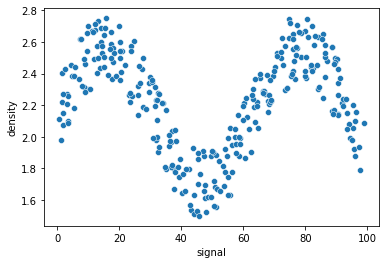

In [8]:
sns.scatterplot(x='signal',y='density',data=data)

### slicing the dataset into independent and dependent features

In [9]:
x=data['signal'].values.reshape(-1,1)
y=data['density']

### train_validation_test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_other, y_train, y_other = train_test_split(x, y, test_size=0.20, random_state=42)

In [12]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.10, random_state=42)

In [13]:
X_train.shape

(240, 1)

In [14]:
X_validation.shape

(6, 1)

In [15]:
X_test.shape

(54, 1)

# comparing between models

In [16]:
def record_model(model,X_train,X_test,y_train,y_test):
    #fit the data into the model
    model.fit(X_train,y_train)
    #predicting the y values
    y_pred=model.predict(X_test)
    #calculating the errors
    mea=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print(f'error terms for {model} are:\n MAE={mea}\nRMSE={rmse}')
    #ploting predicted data points for some random value within the range
    sample_x=np.arange(0,101)
    y_pred_sam=model.predict(sample_x.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='signal',y='density',data=data,color='black')
    plt.plot(sample_x,y_pred_sam,color='red')
    plt.show()

## Linear model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
lin_model=LinearRegression()

error terms for LinearRegression() are:
 MAE=0.2844051198916241
RMSE=0.33761913239089436


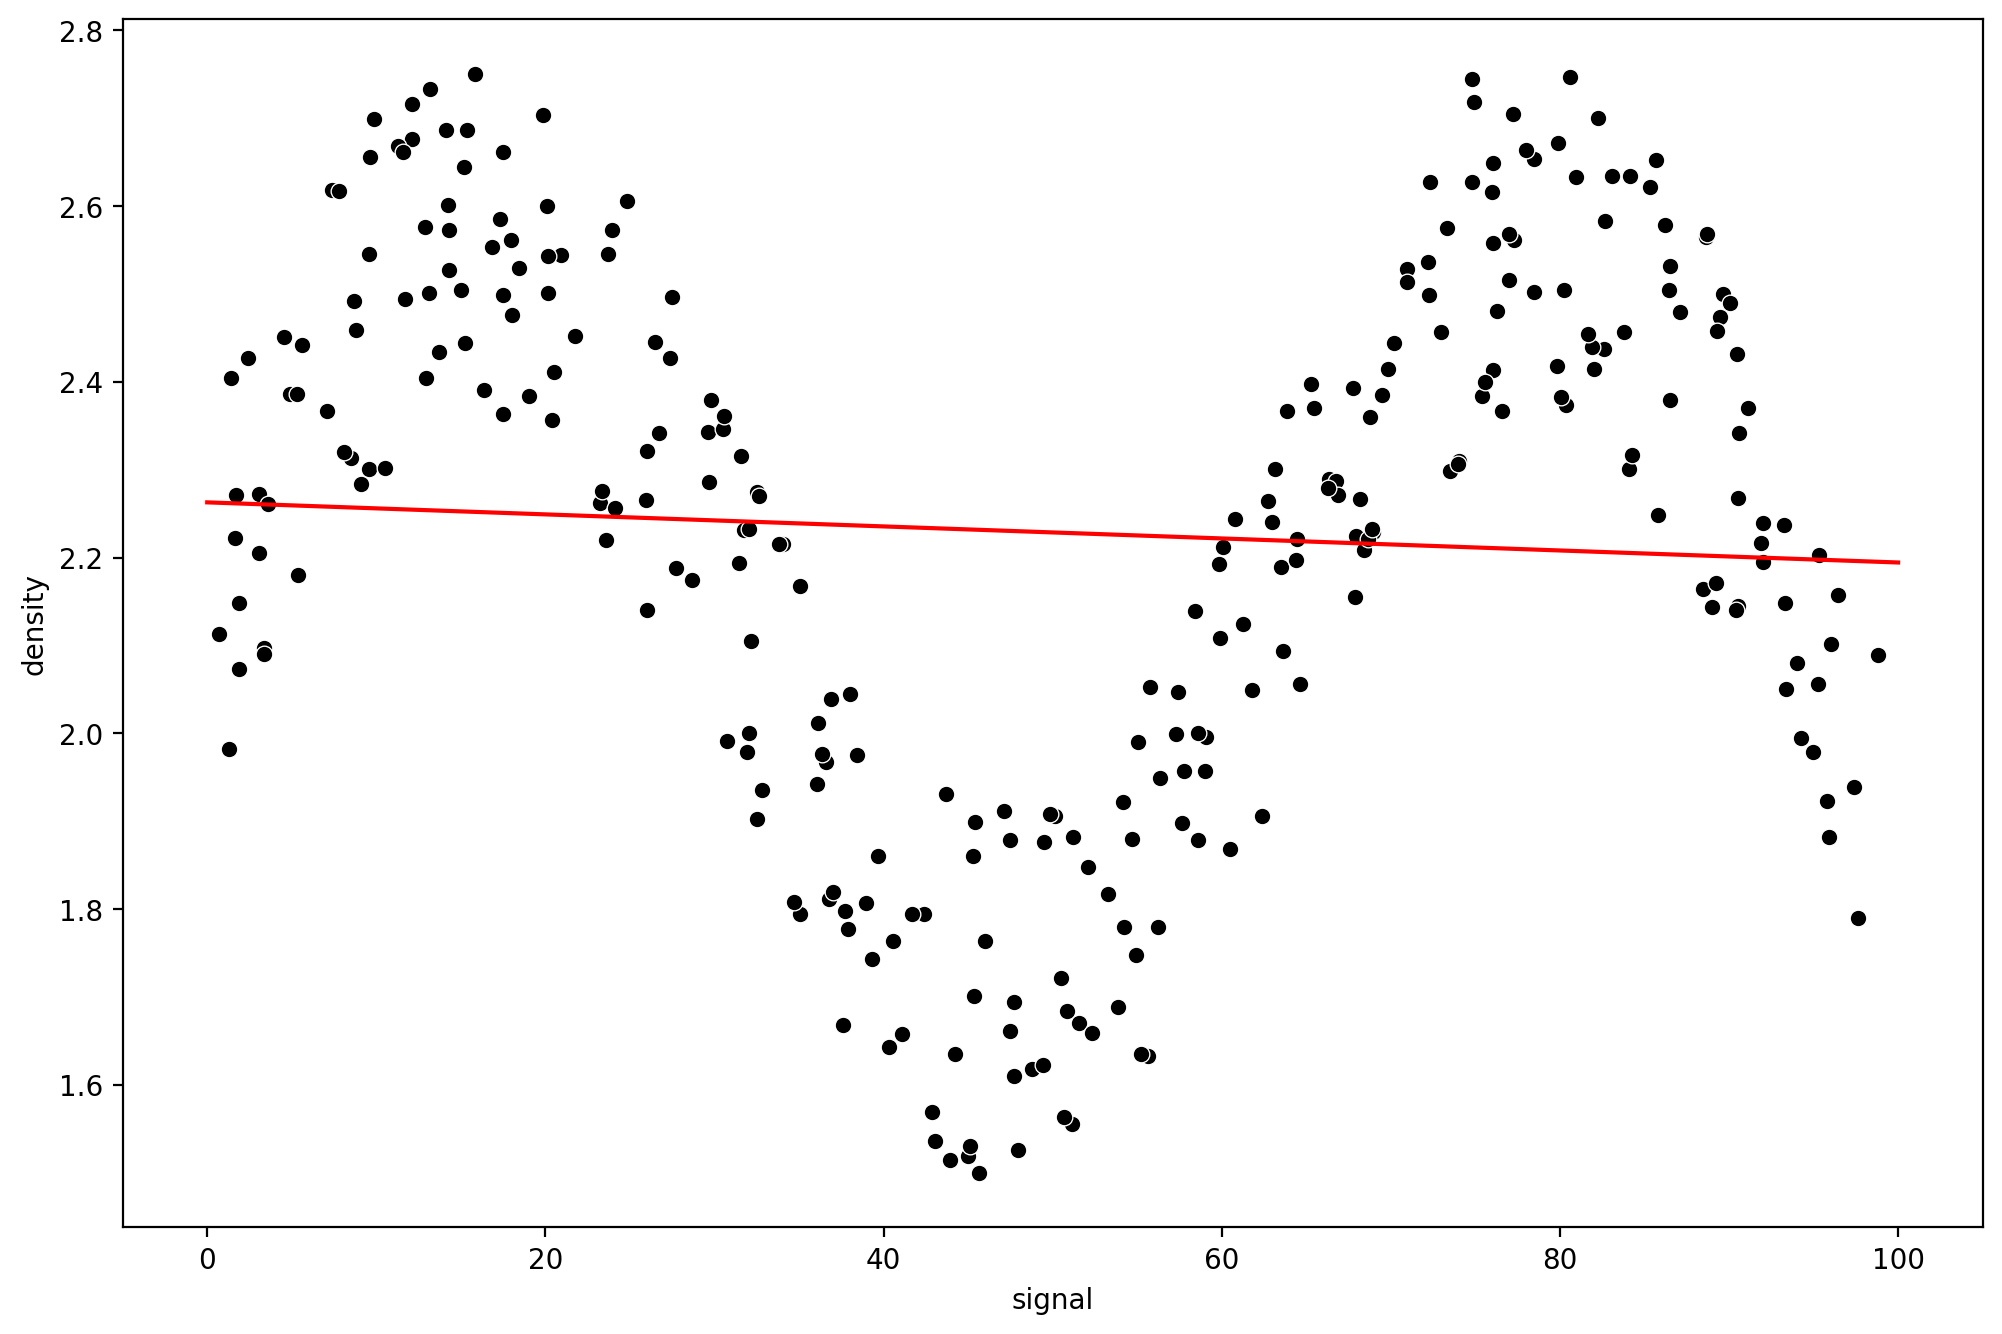

In [19]:
record_model(lin_model,X_train,X_test,y_train,y_test)

###### it is clearly visible that though MSE and RMSE are not that much bad for linear model but by the graph we can see that linear model is performing poorly for this dataset

## polynomial model

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
polymodel=PolynomialFeatures()

error terms for LinearRegression(),degree=1 are:
 MAE=0.2844051198916241
RMSE=0.33761913239089436




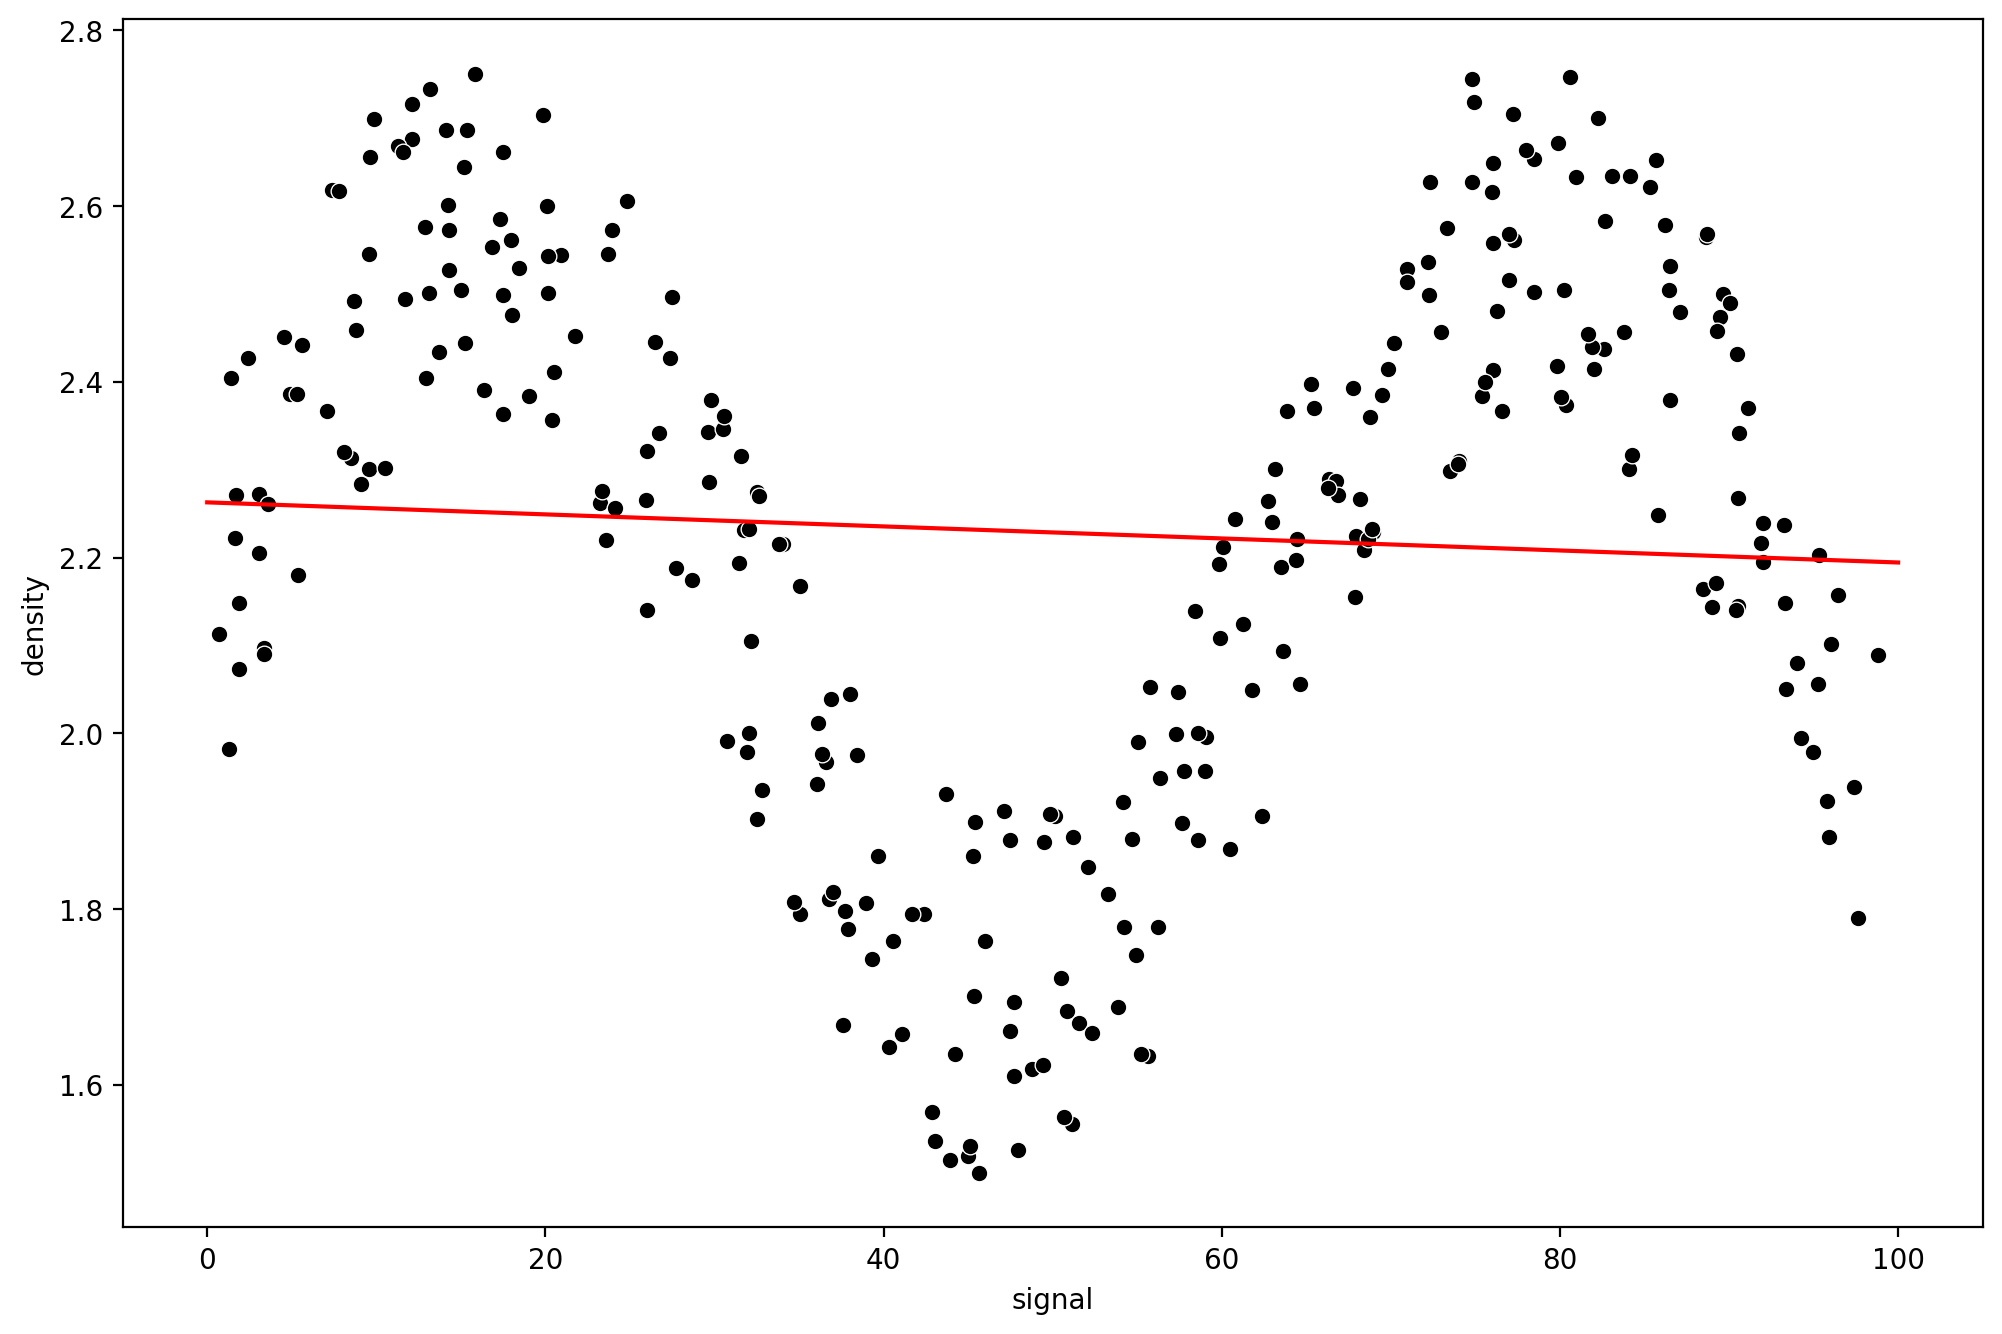

error terms for LinearRegression(),degree=2 are:
 MAE=0.2767250930788212
RMSE=0.3255503803309821




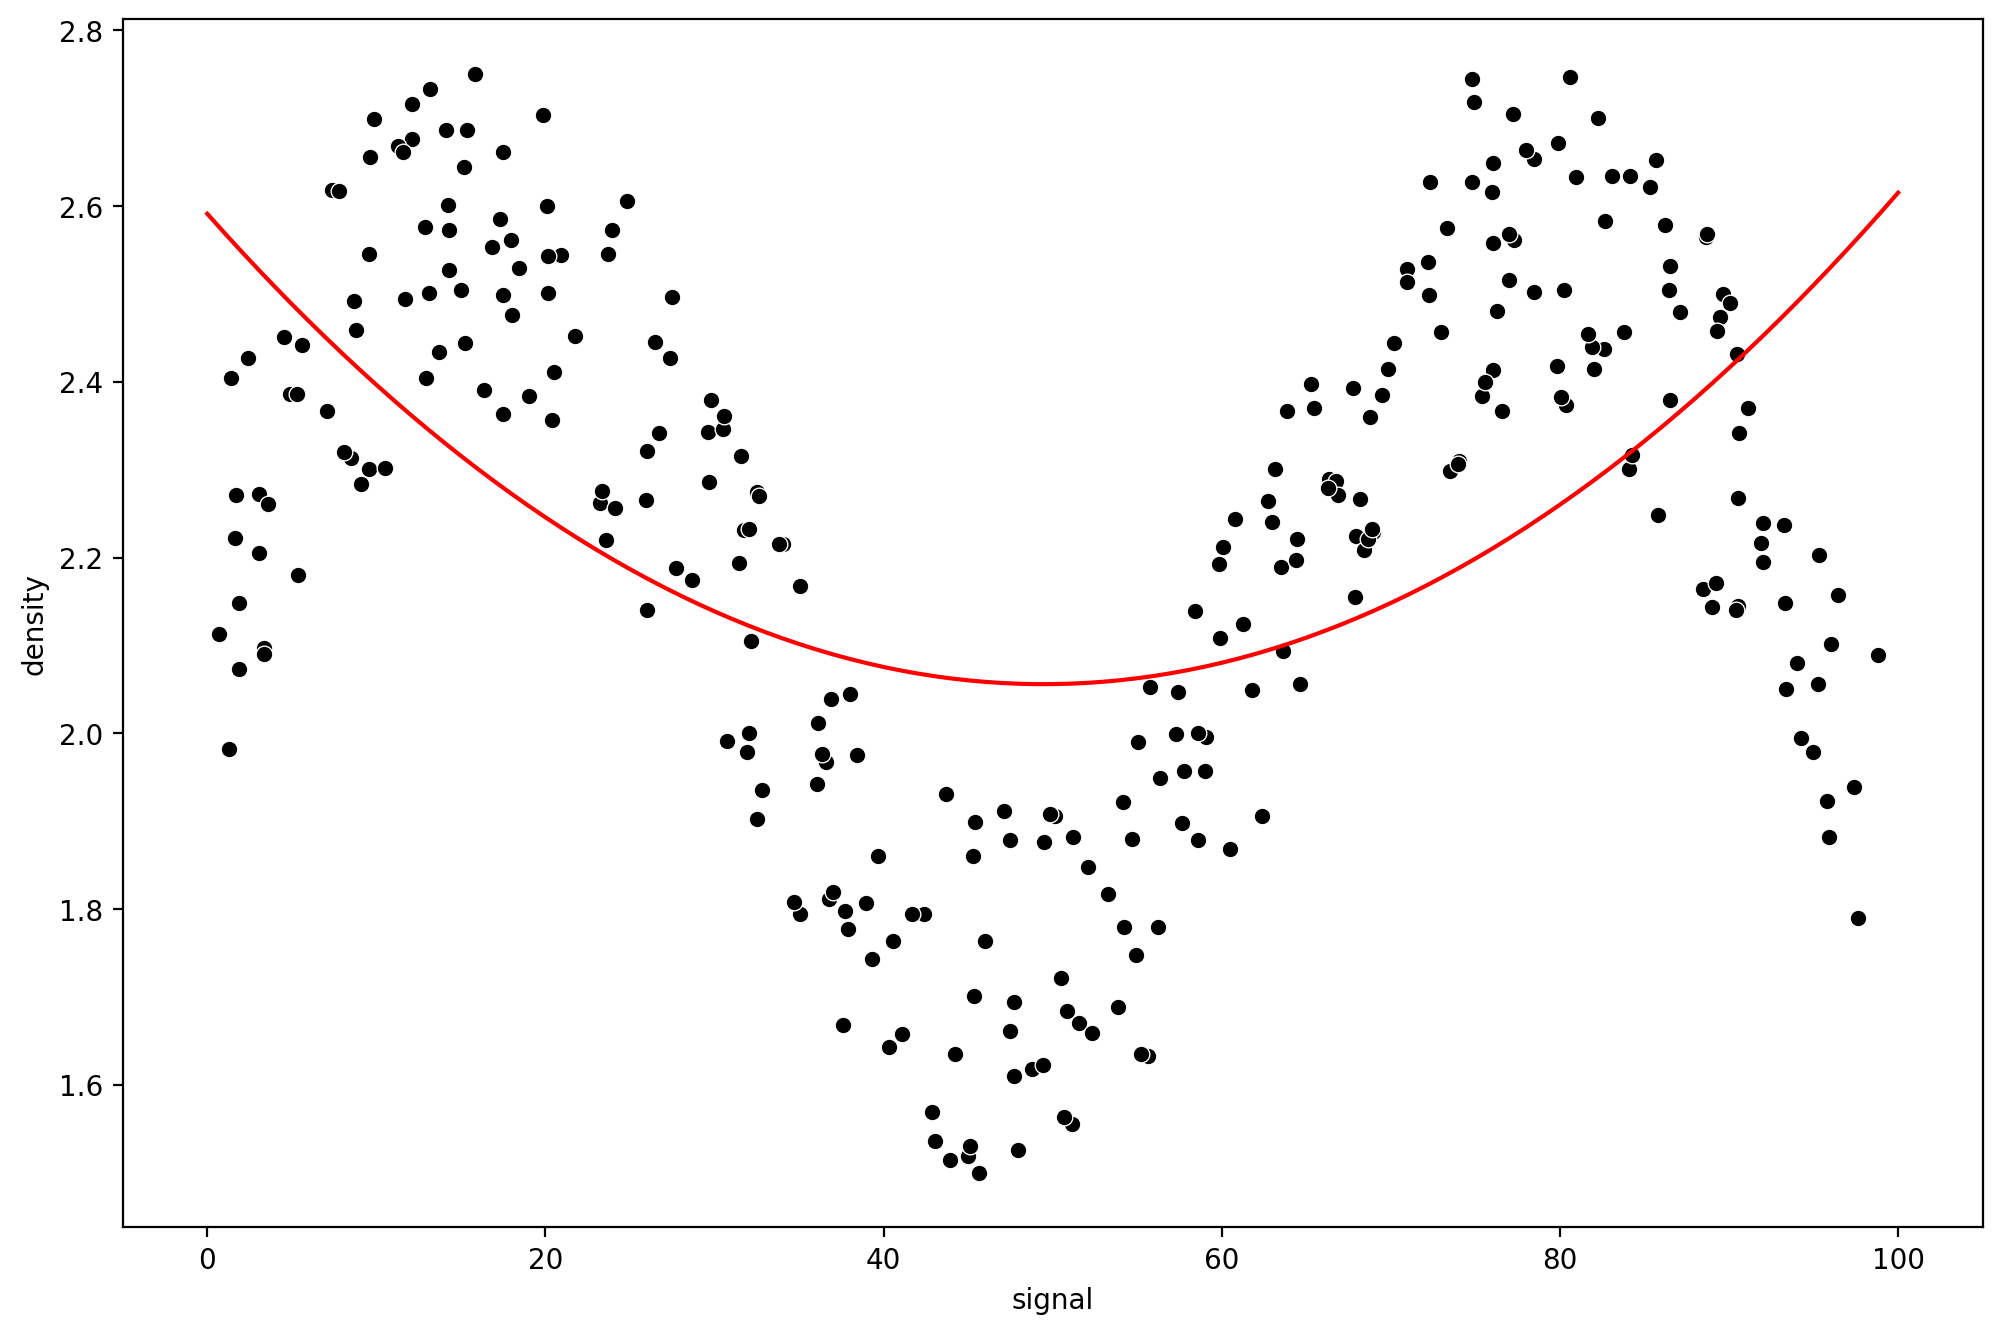

error terms for LinearRegression(),degree=3 are:
 MAE=0.26209589124864413
RMSE=0.3090172526248269




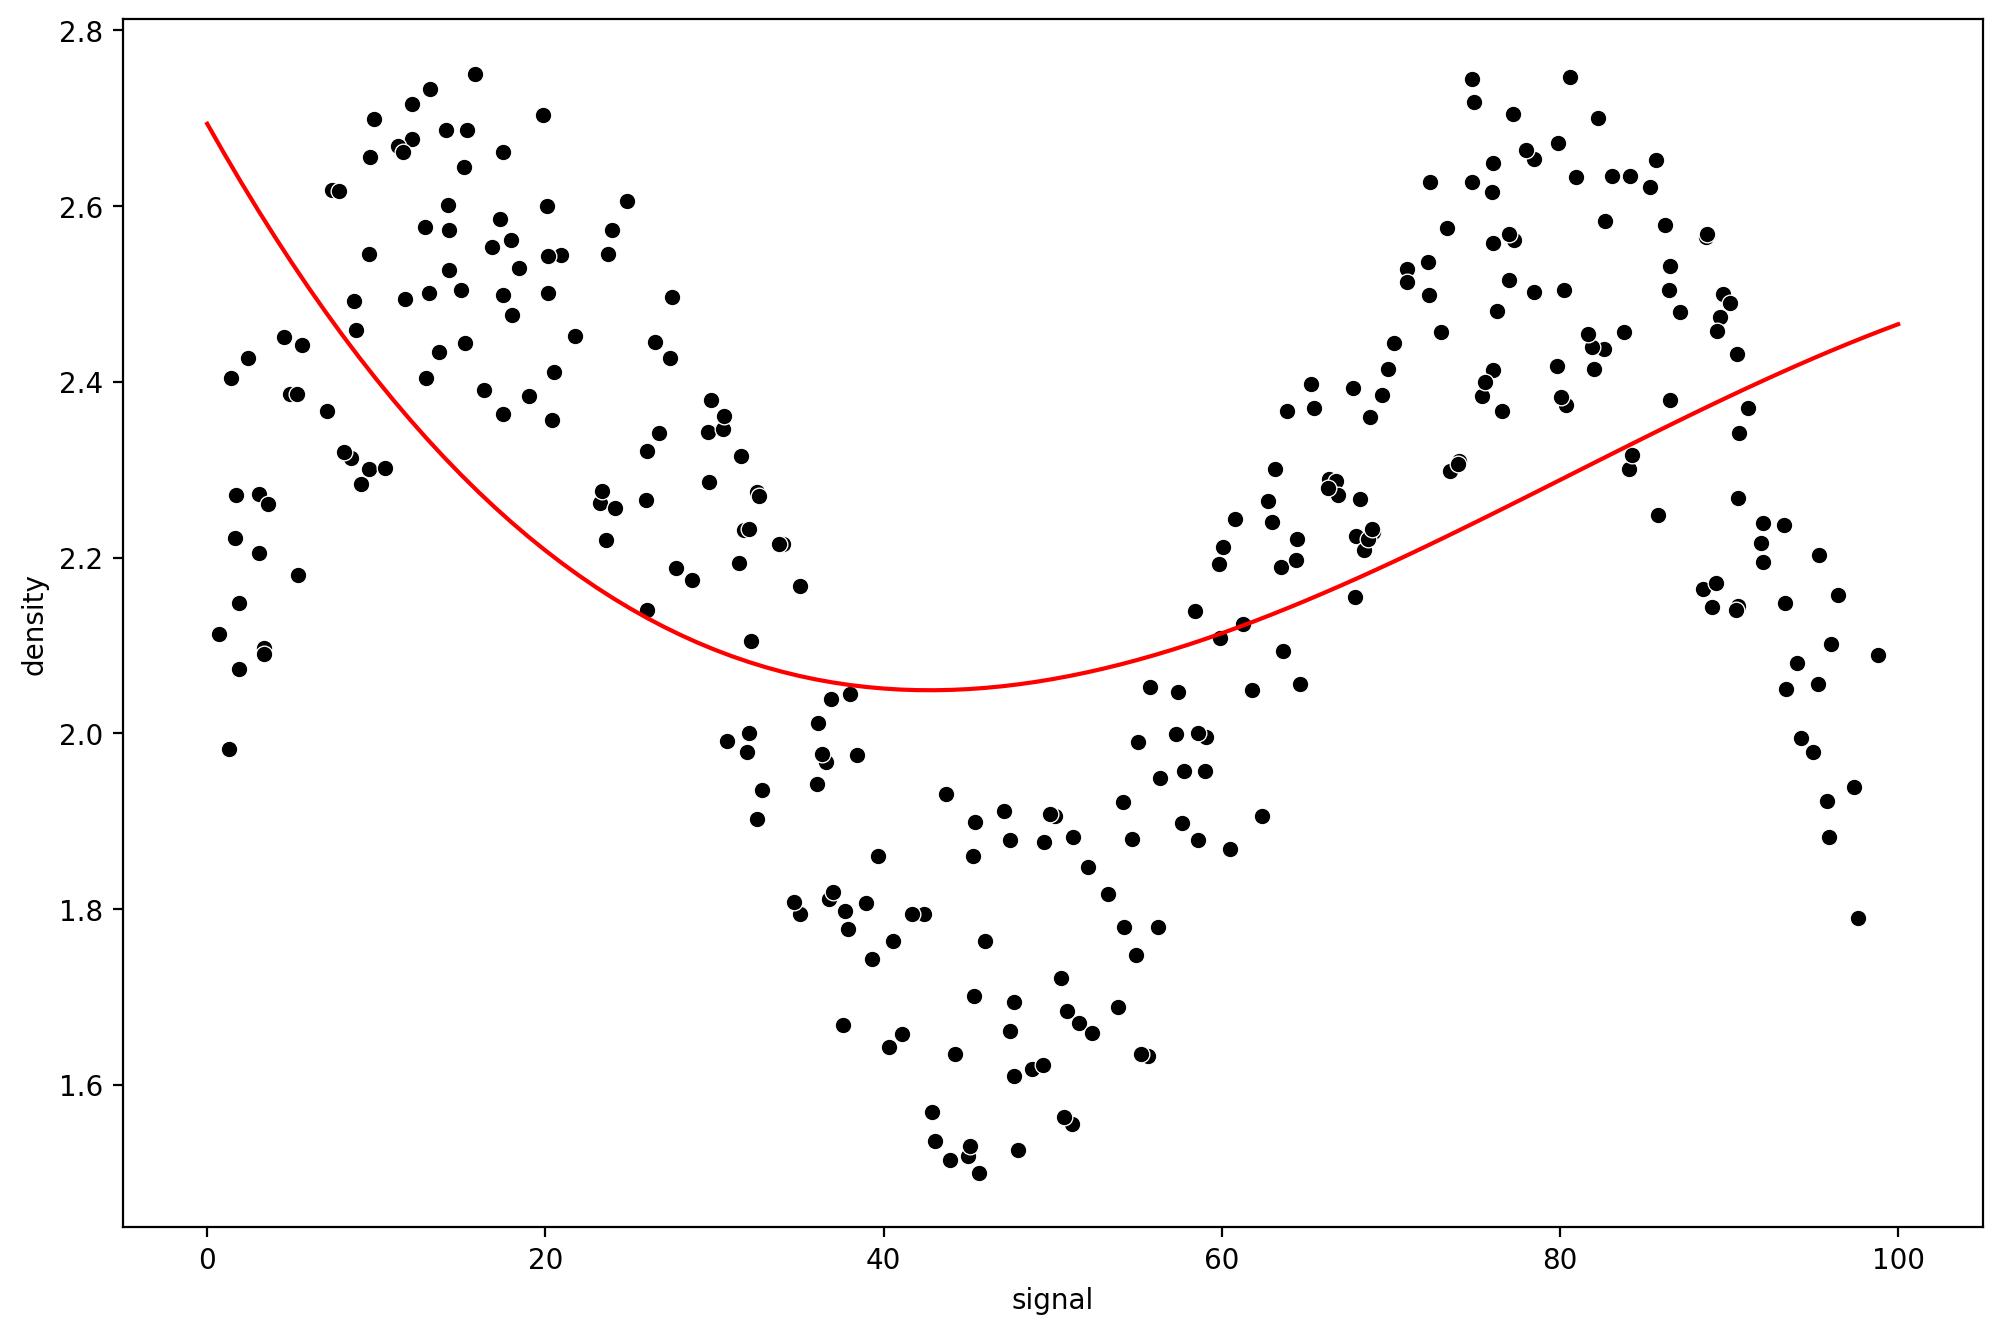

error terms for LinearRegression(),degree=4 are:
 MAE=0.13202233700814037
RMSE=0.1560181997344969




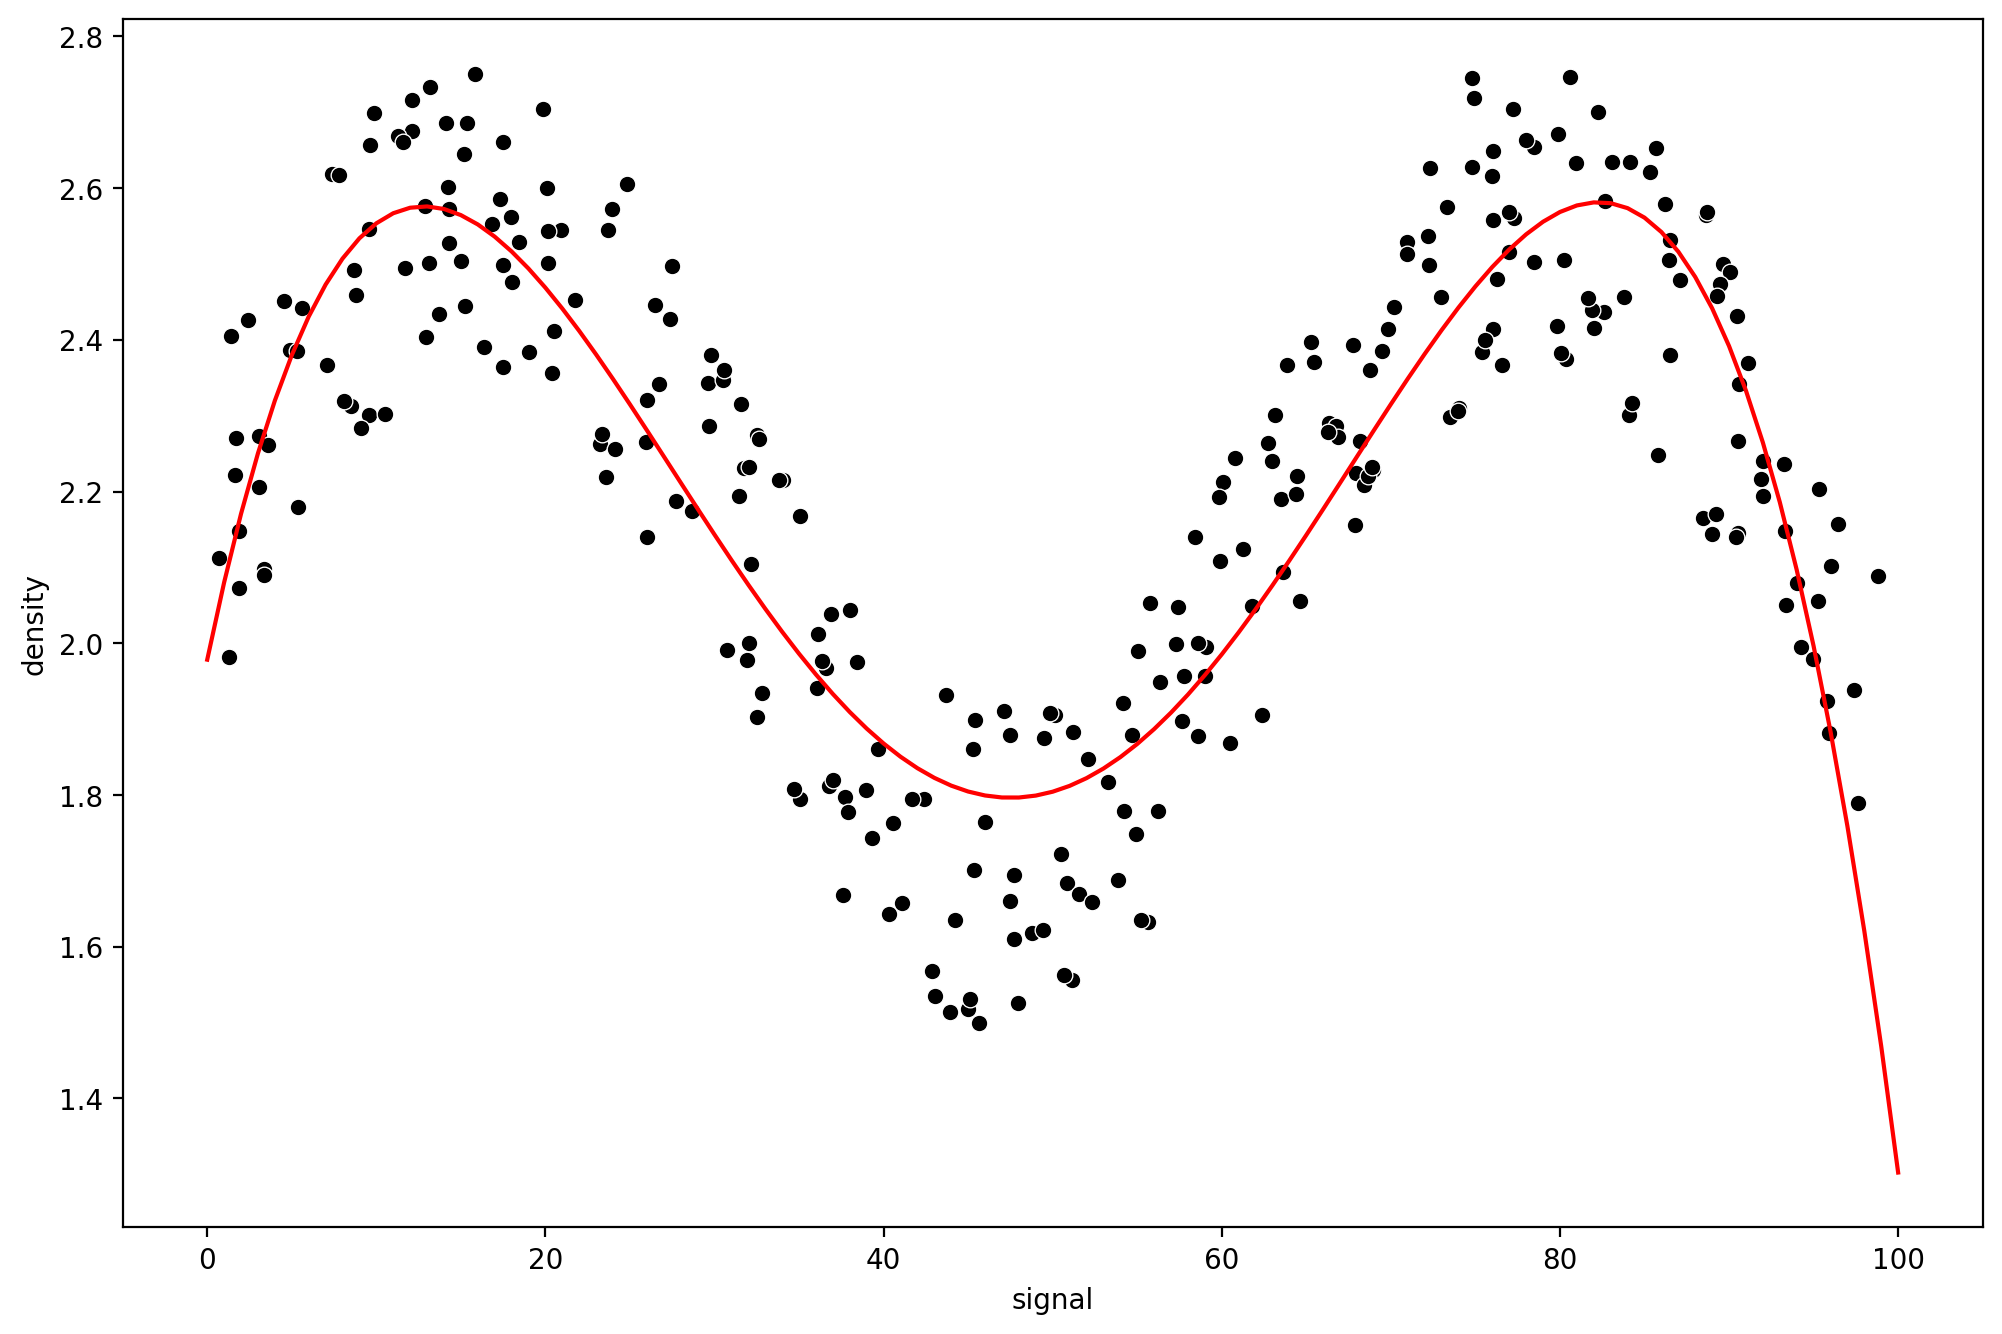

error terms for LinearRegression(),degree=5 are:
 MAE=0.12564733719284724
RMSE=0.14843936050465936




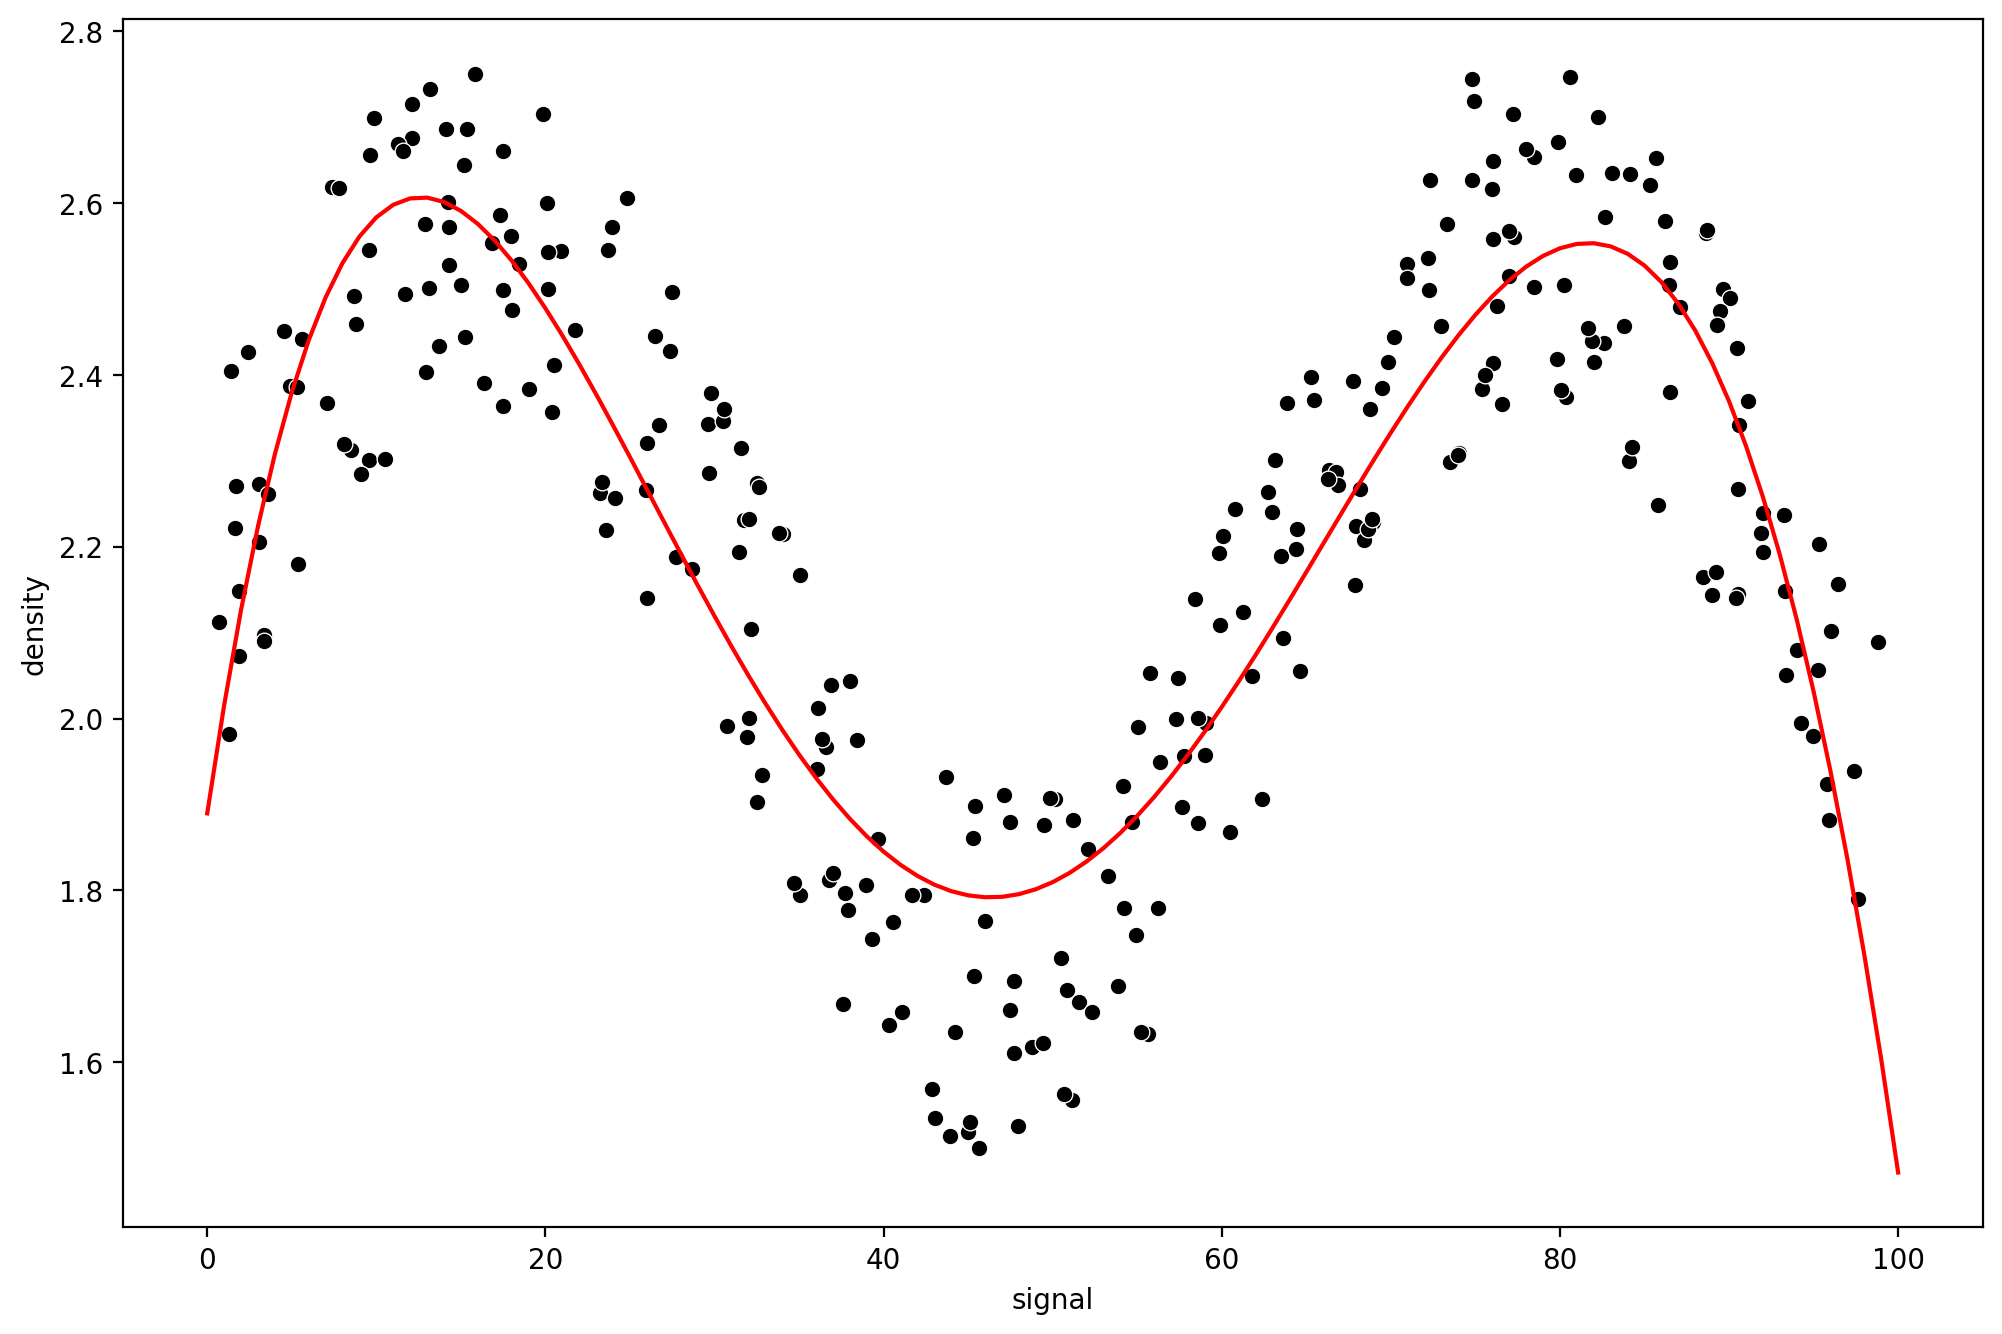

error terms for LinearRegression(),degree=6 are:
 MAE=0.12217978866120473
RMSE=0.13865736894204897




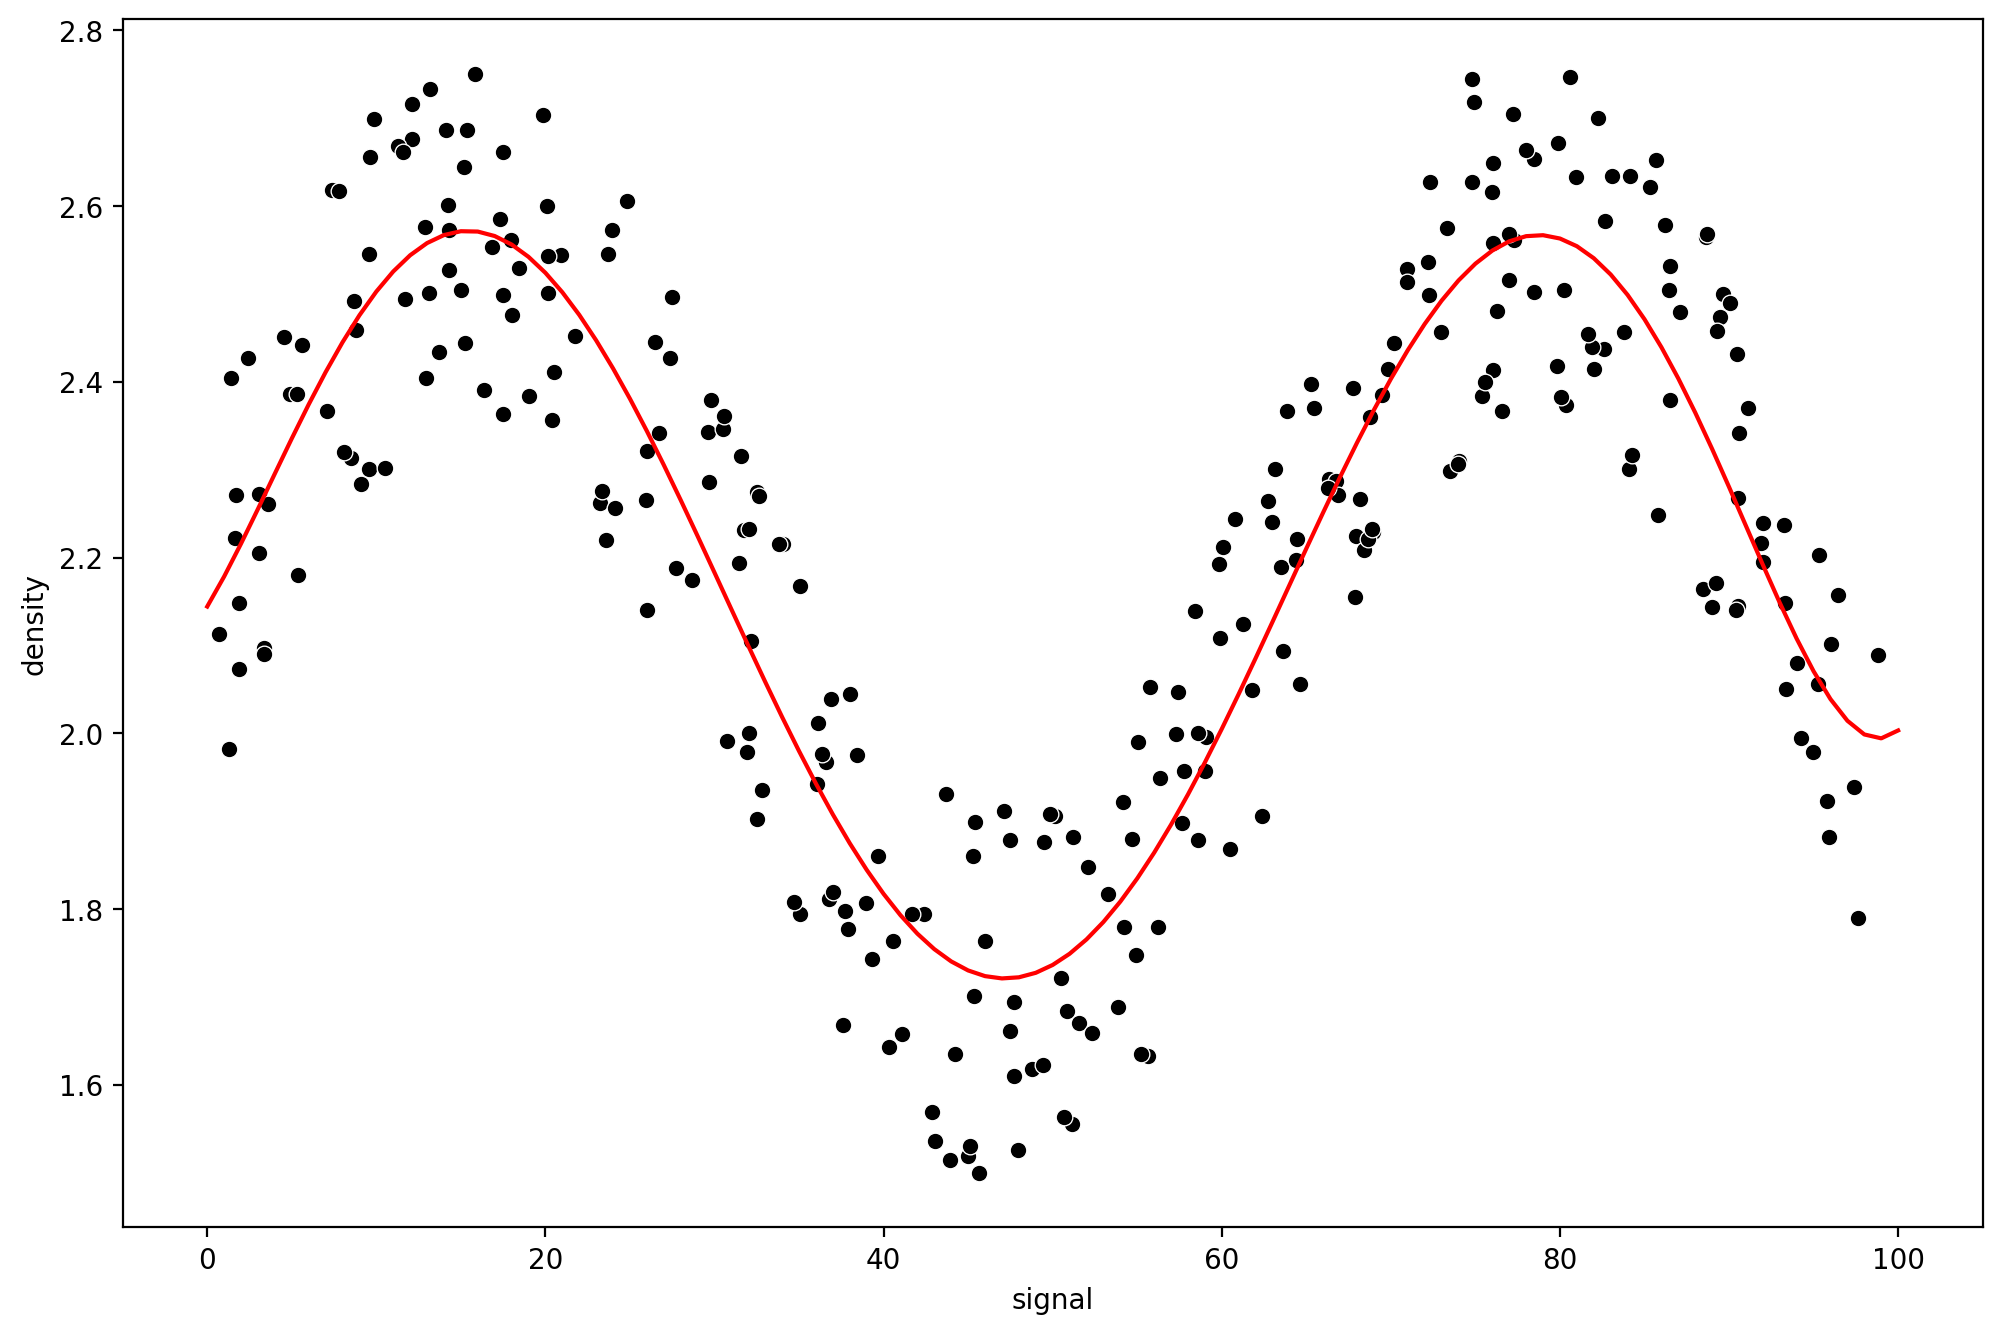

error terms for LinearRegression(),degree=7 are:
 MAE=0.12170121892536719
RMSE=0.13781983682080262




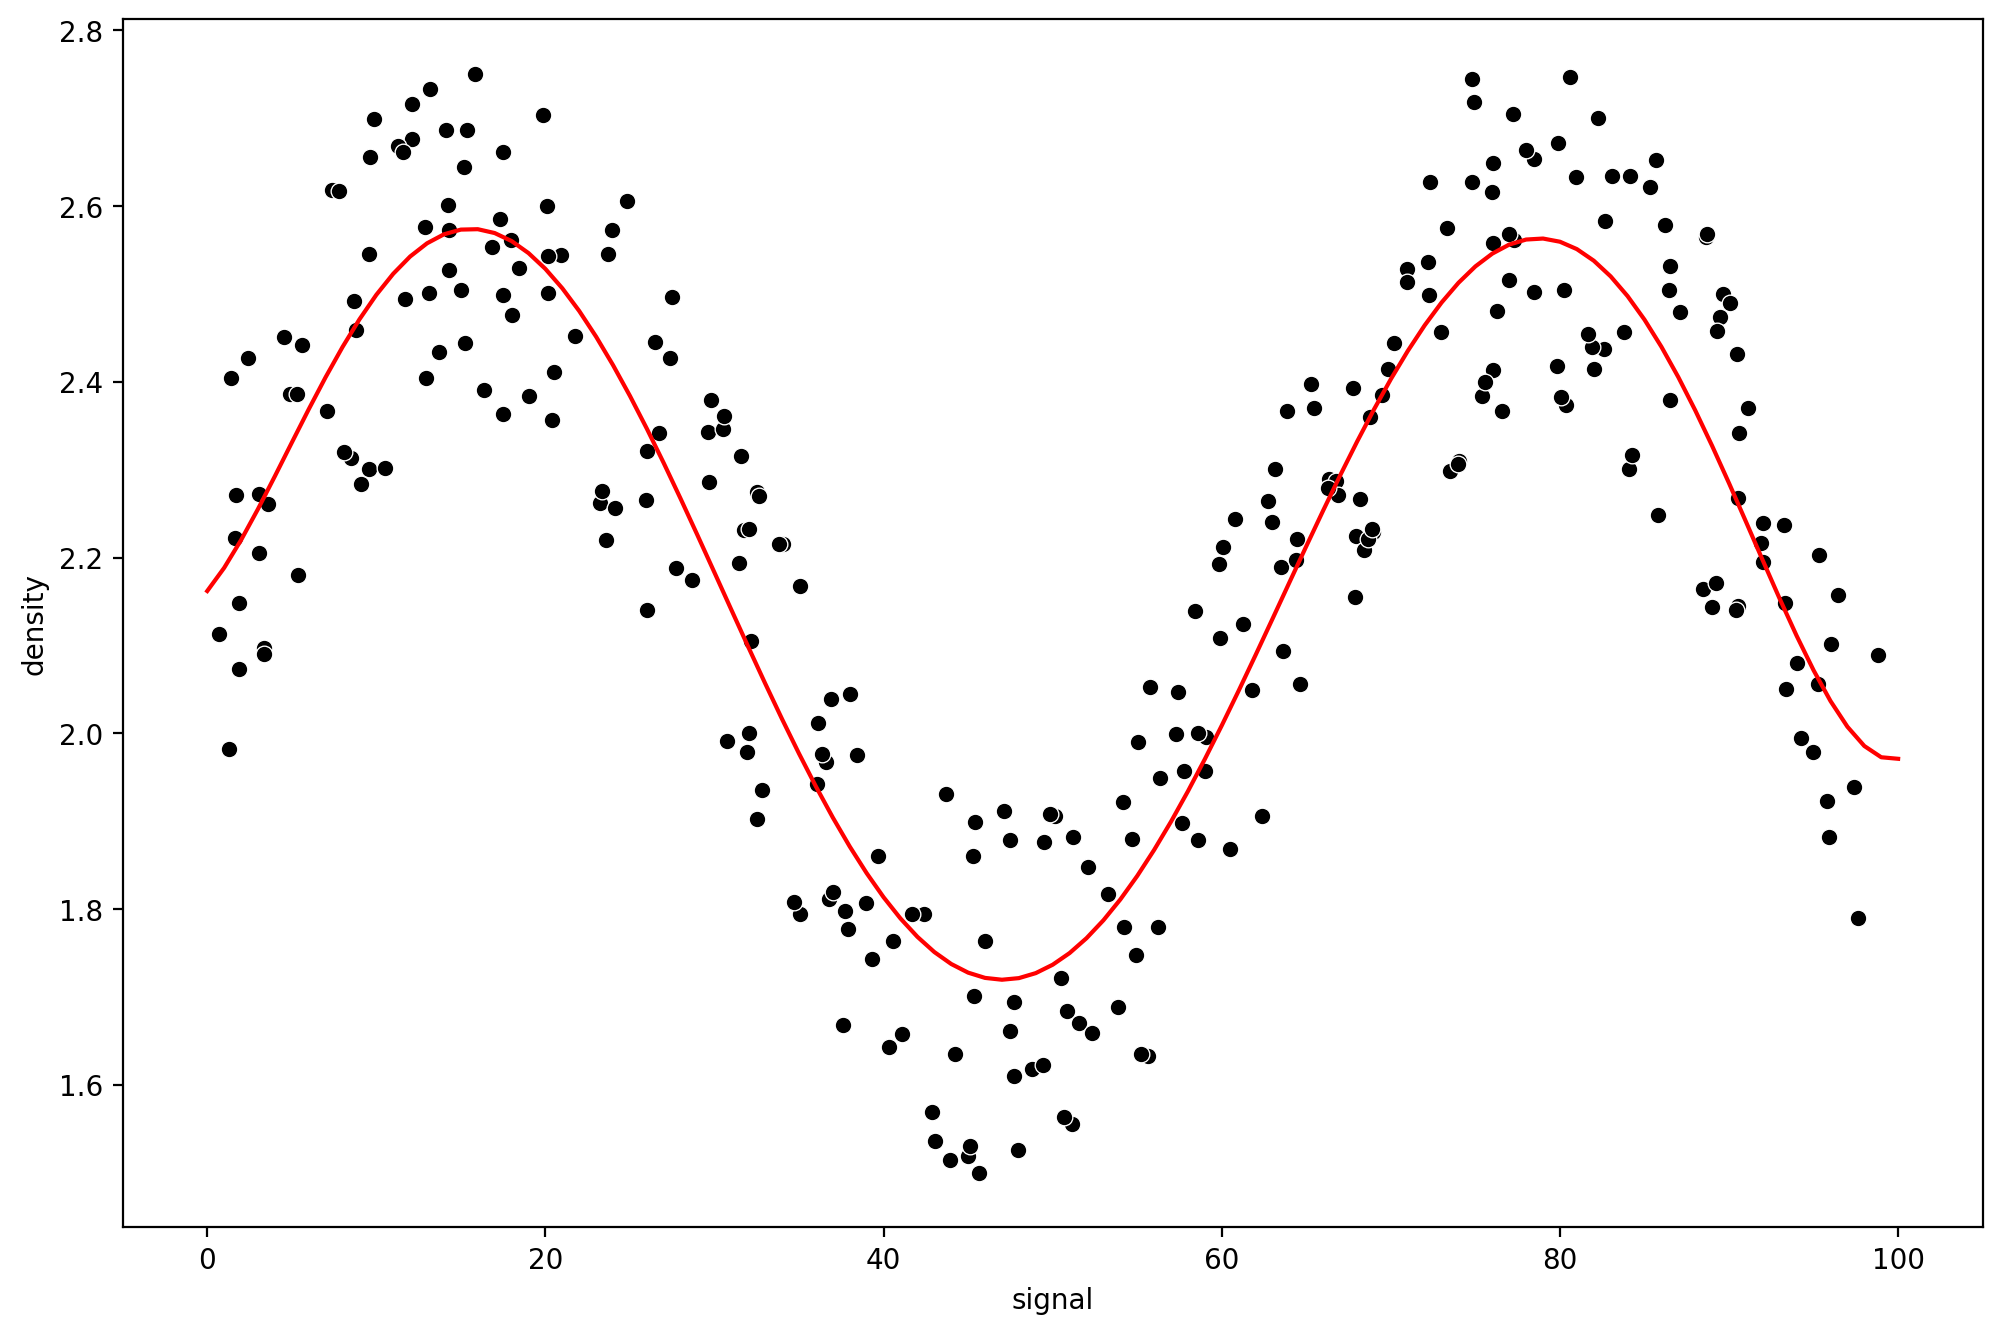

error terms for LinearRegression(),degree=8 are:
 MAE=0.12183500663456961
RMSE=0.1375434941261049




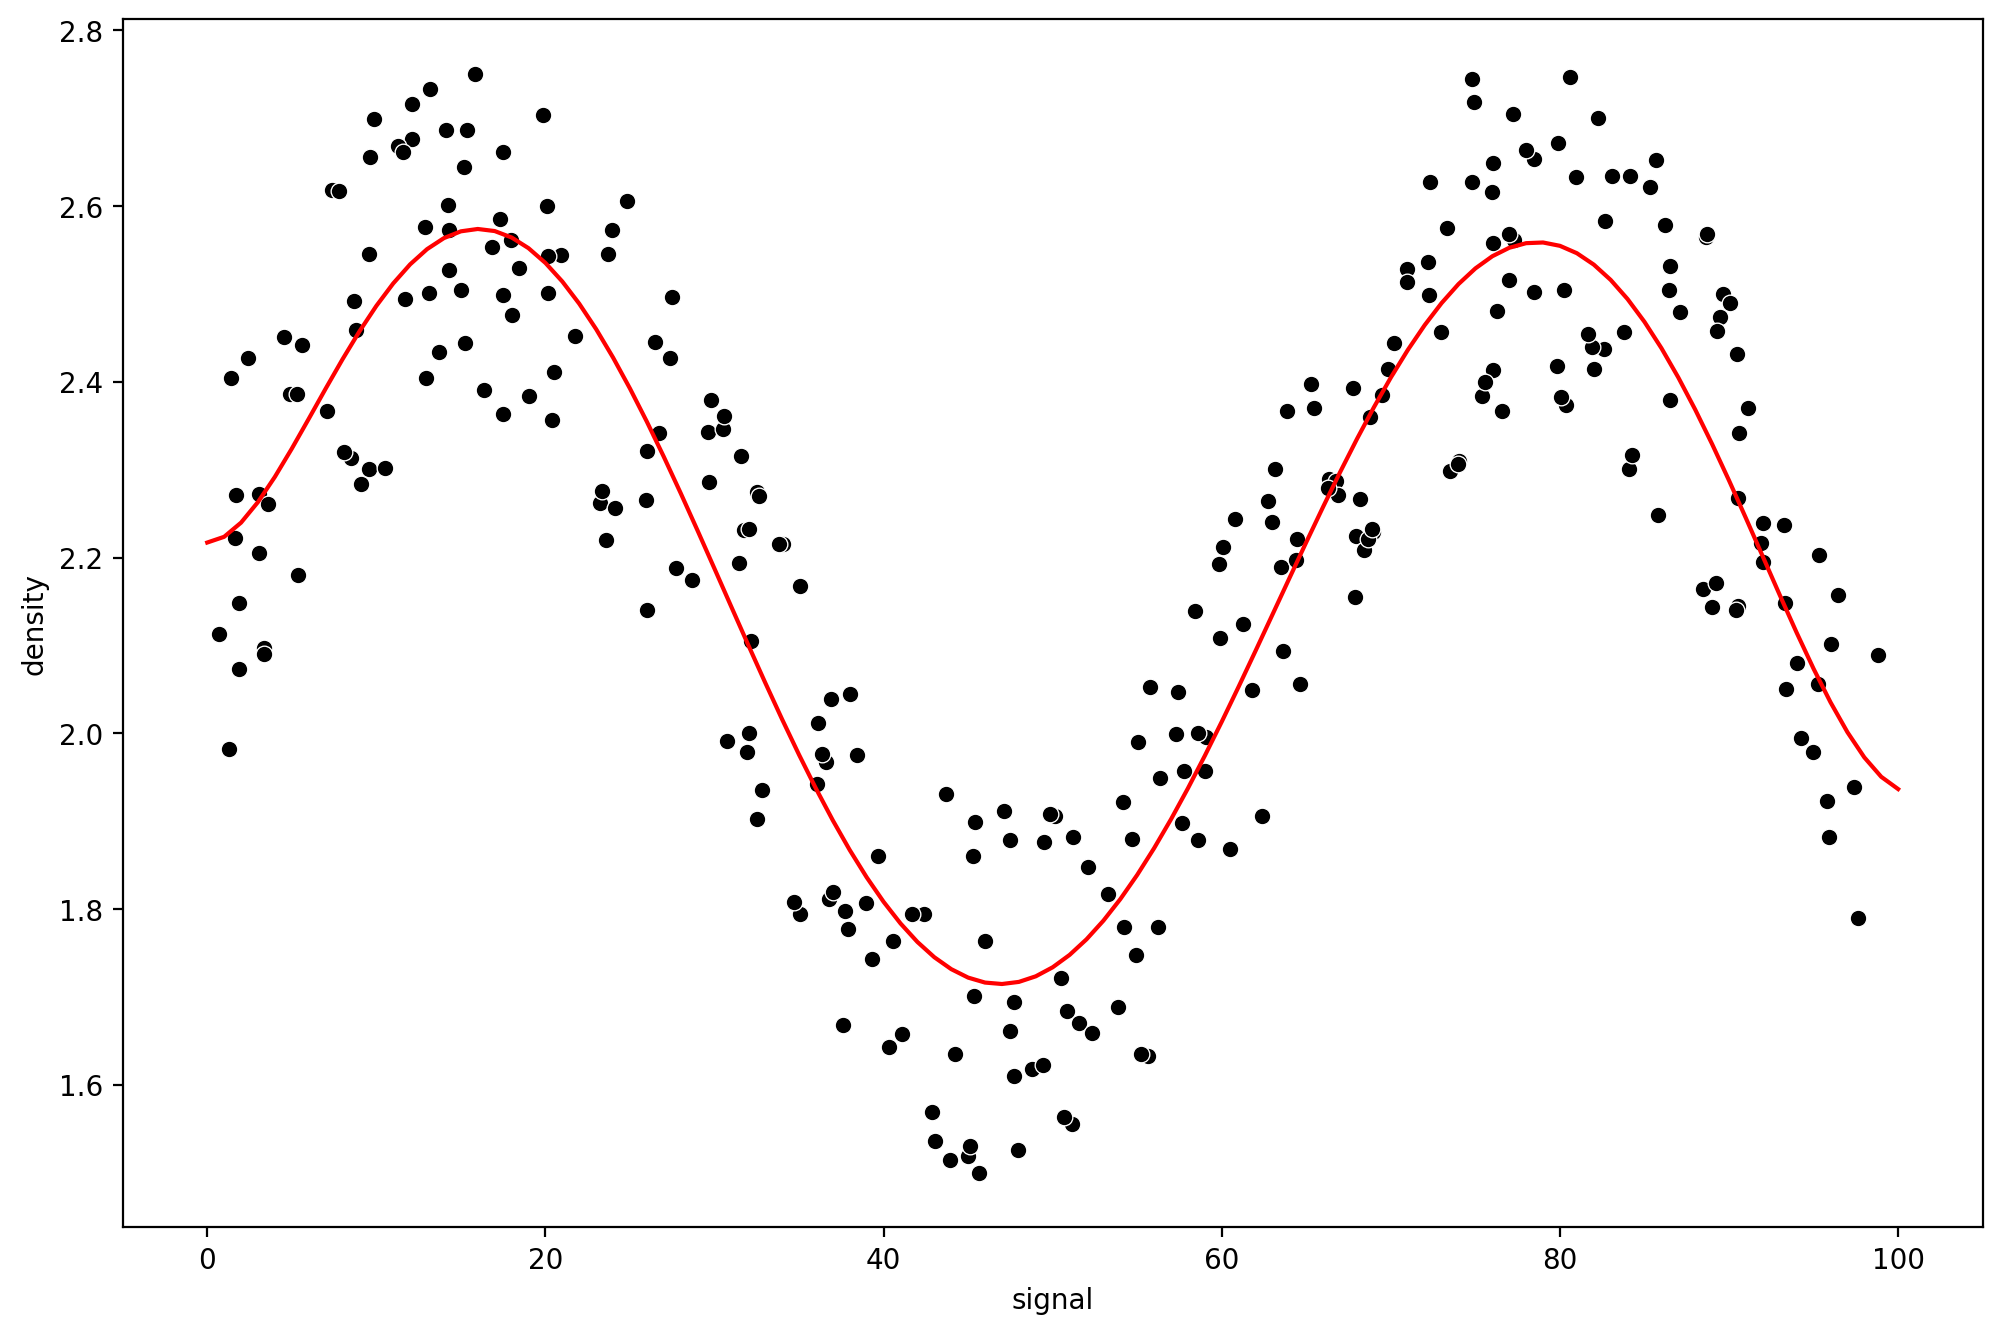

error terms for LinearRegression(),degree=9 are:
 MAE=0.12439570073623935
RMSE=0.13961220128535137




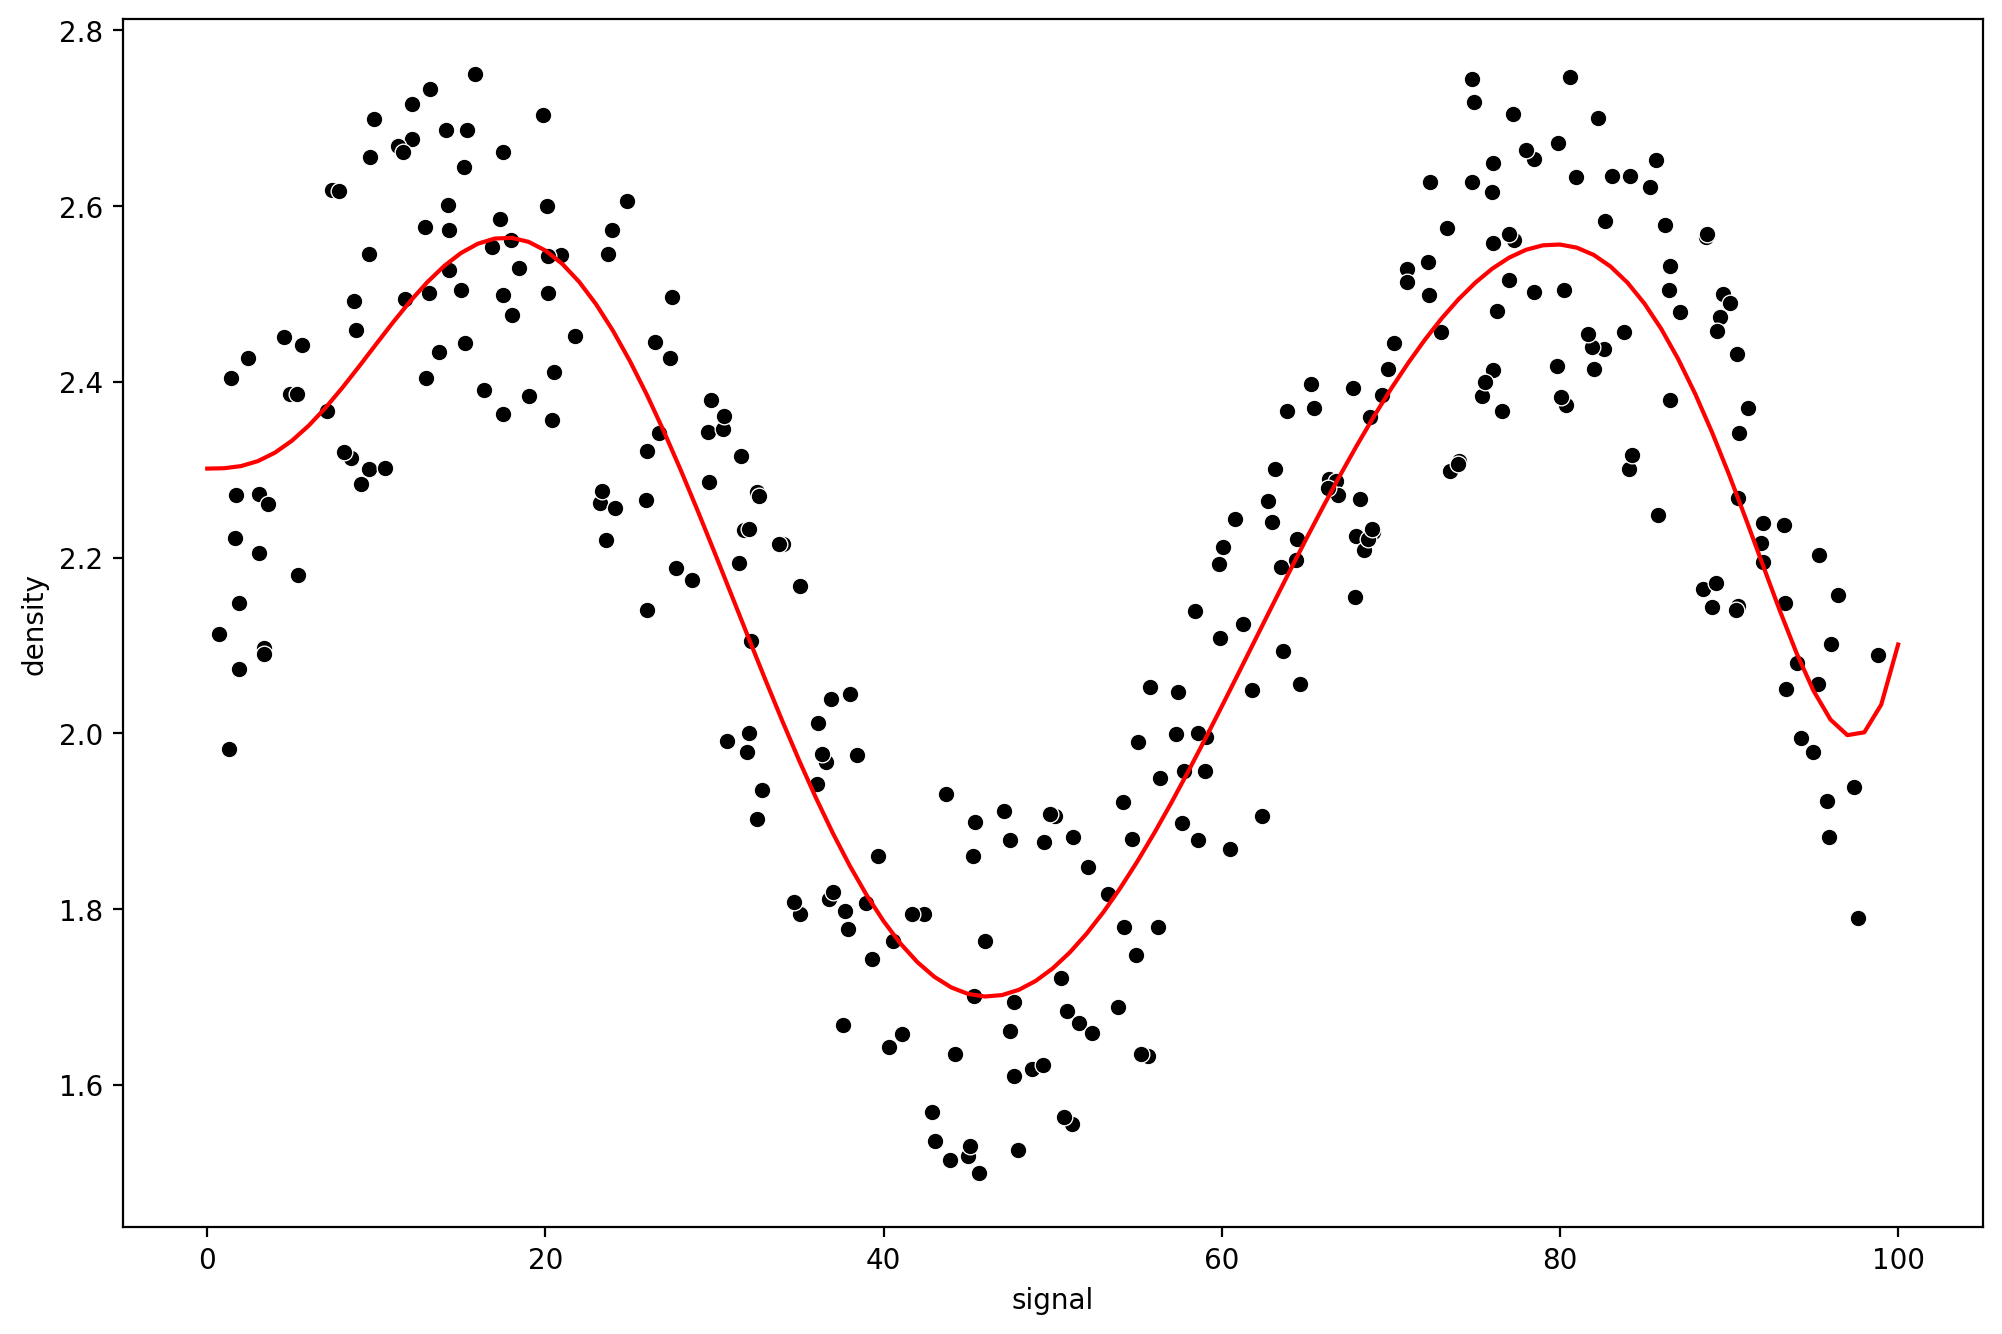

error terms for LinearRegression(),degree=10 are:
 MAE=0.1285344506111872
RMSE=0.14772431517464027




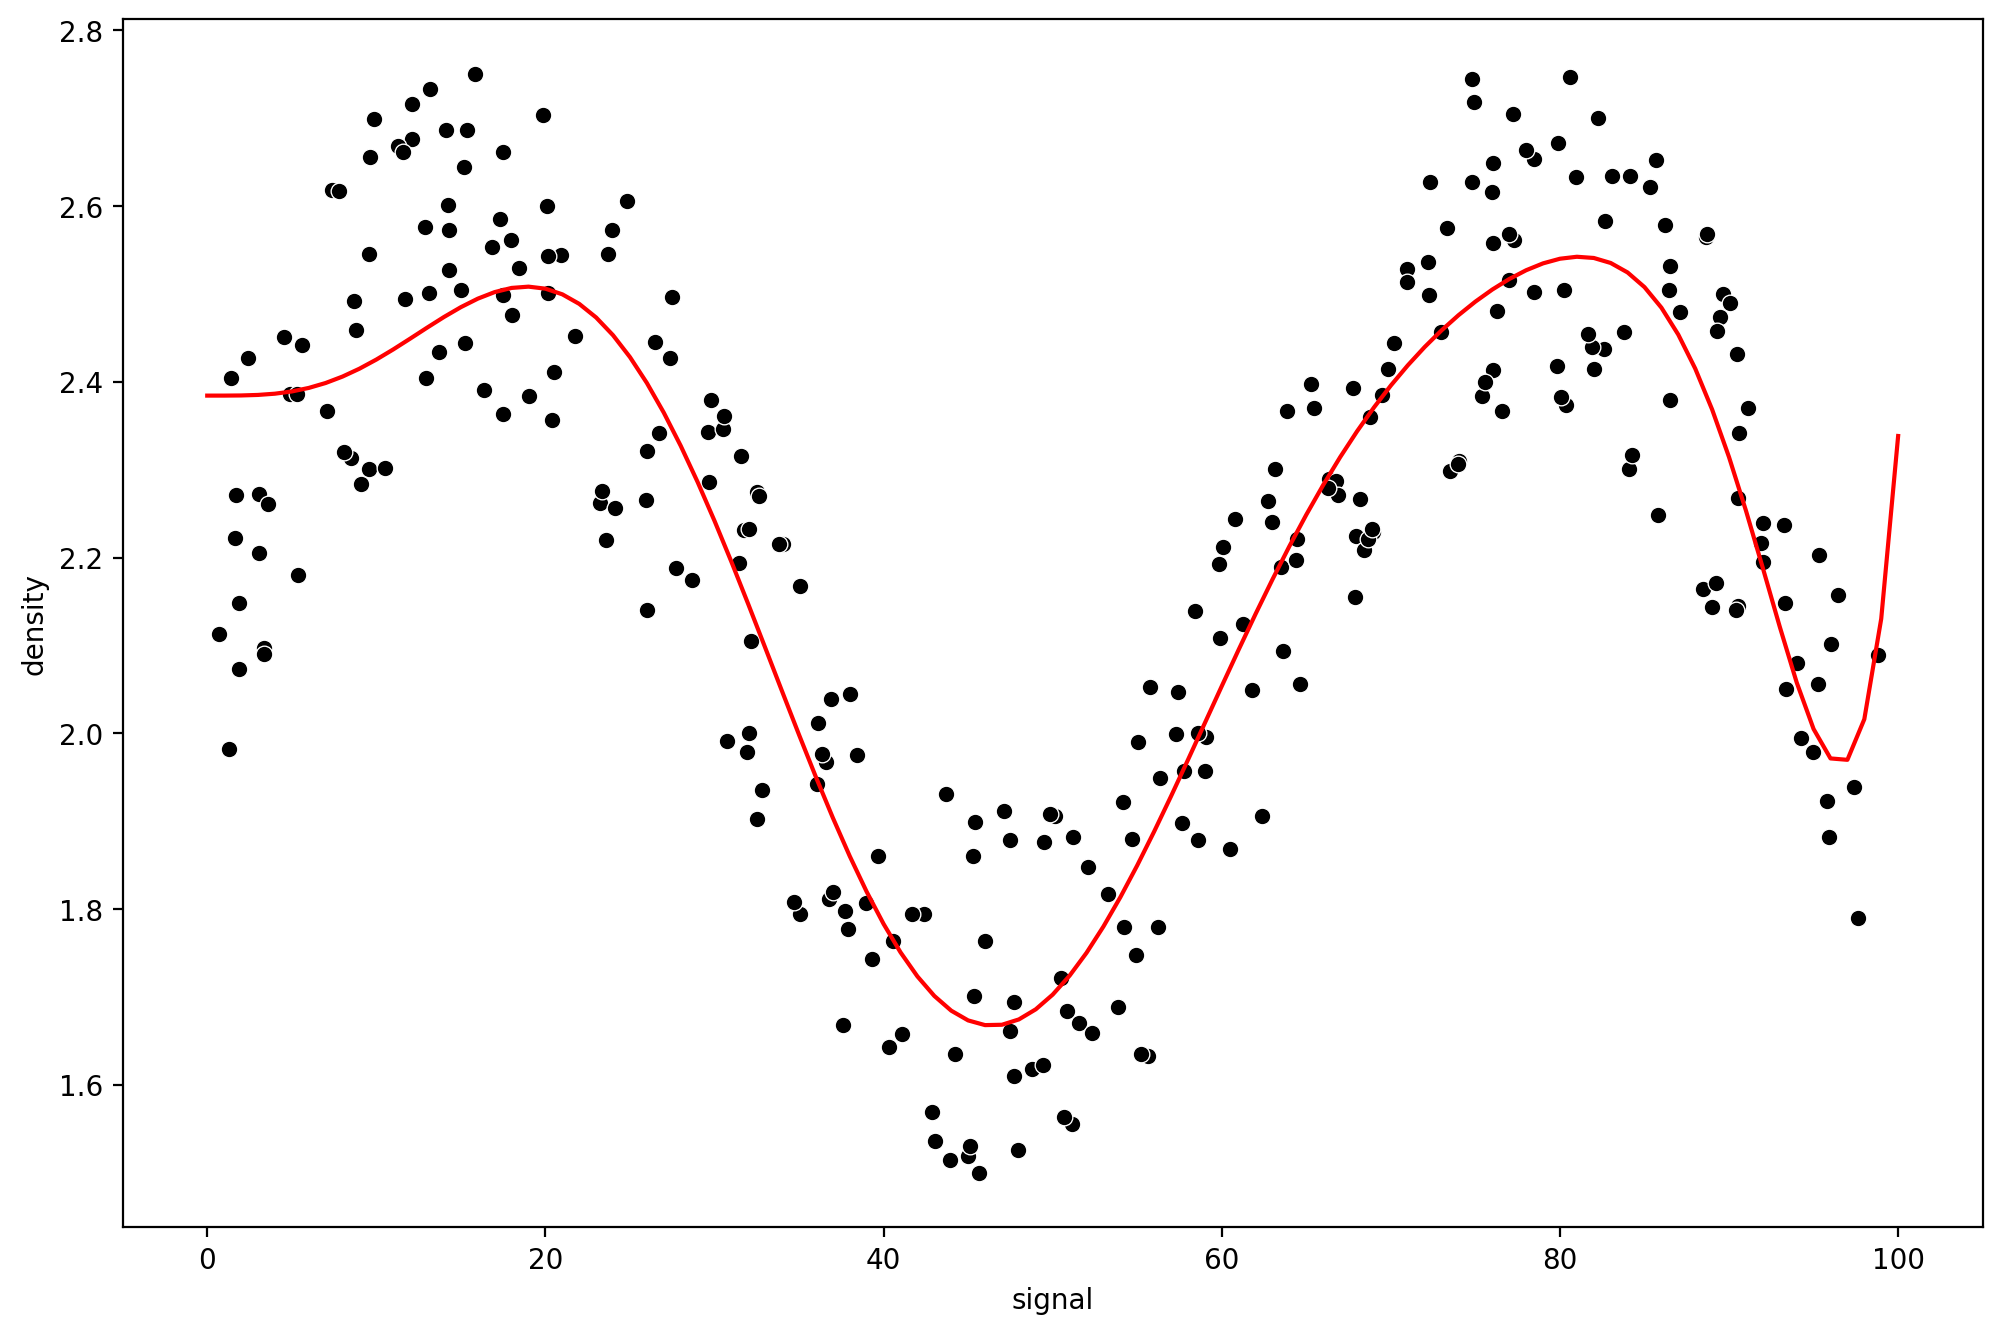

In [22]:
for i in range(1,11):
    polymodel=PolynomialFeatures(degree=i)
    poly_X_train=polymodel.fit_transform(X_train)
    poly_X_test=polymodel.transform(X_test)
    lin_model.fit(poly_X_train,y_train)
    y_pred_poly=lin_model.predict(poly_X_test)
    mea=mean_absolute_error(y_test,y_pred_poly)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred_poly))
    print(f'error terms for {lin_model},degree={i} are:\n MAE={mea}\nRMSE={rmse}\n\n')
    sample_x=np.arange(0,101)
    y_pred_sam=lin_model.predict(polymodel.transform(sample_x.reshape(-1,1)))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='signal',y='density',data=data,color='black')
    plt.plot(sample_x,y_pred_sam,color='red')
    plt.show()

######  in polinomial model for degree=6 the model performed well for the training data as from the graph we can visualise there is high variance.so if we are sure in future the signal range will vary between 0 to 100 then only polynimial model can behave good

### KNN regressor

In [23]:
from sklearn.neighbors import KNeighborsRegressor

error terms for KNeighborsRegressor(n_neighbors=1) are:
 MAE=0.1346675918083377
RMSE=0.18148818543023754


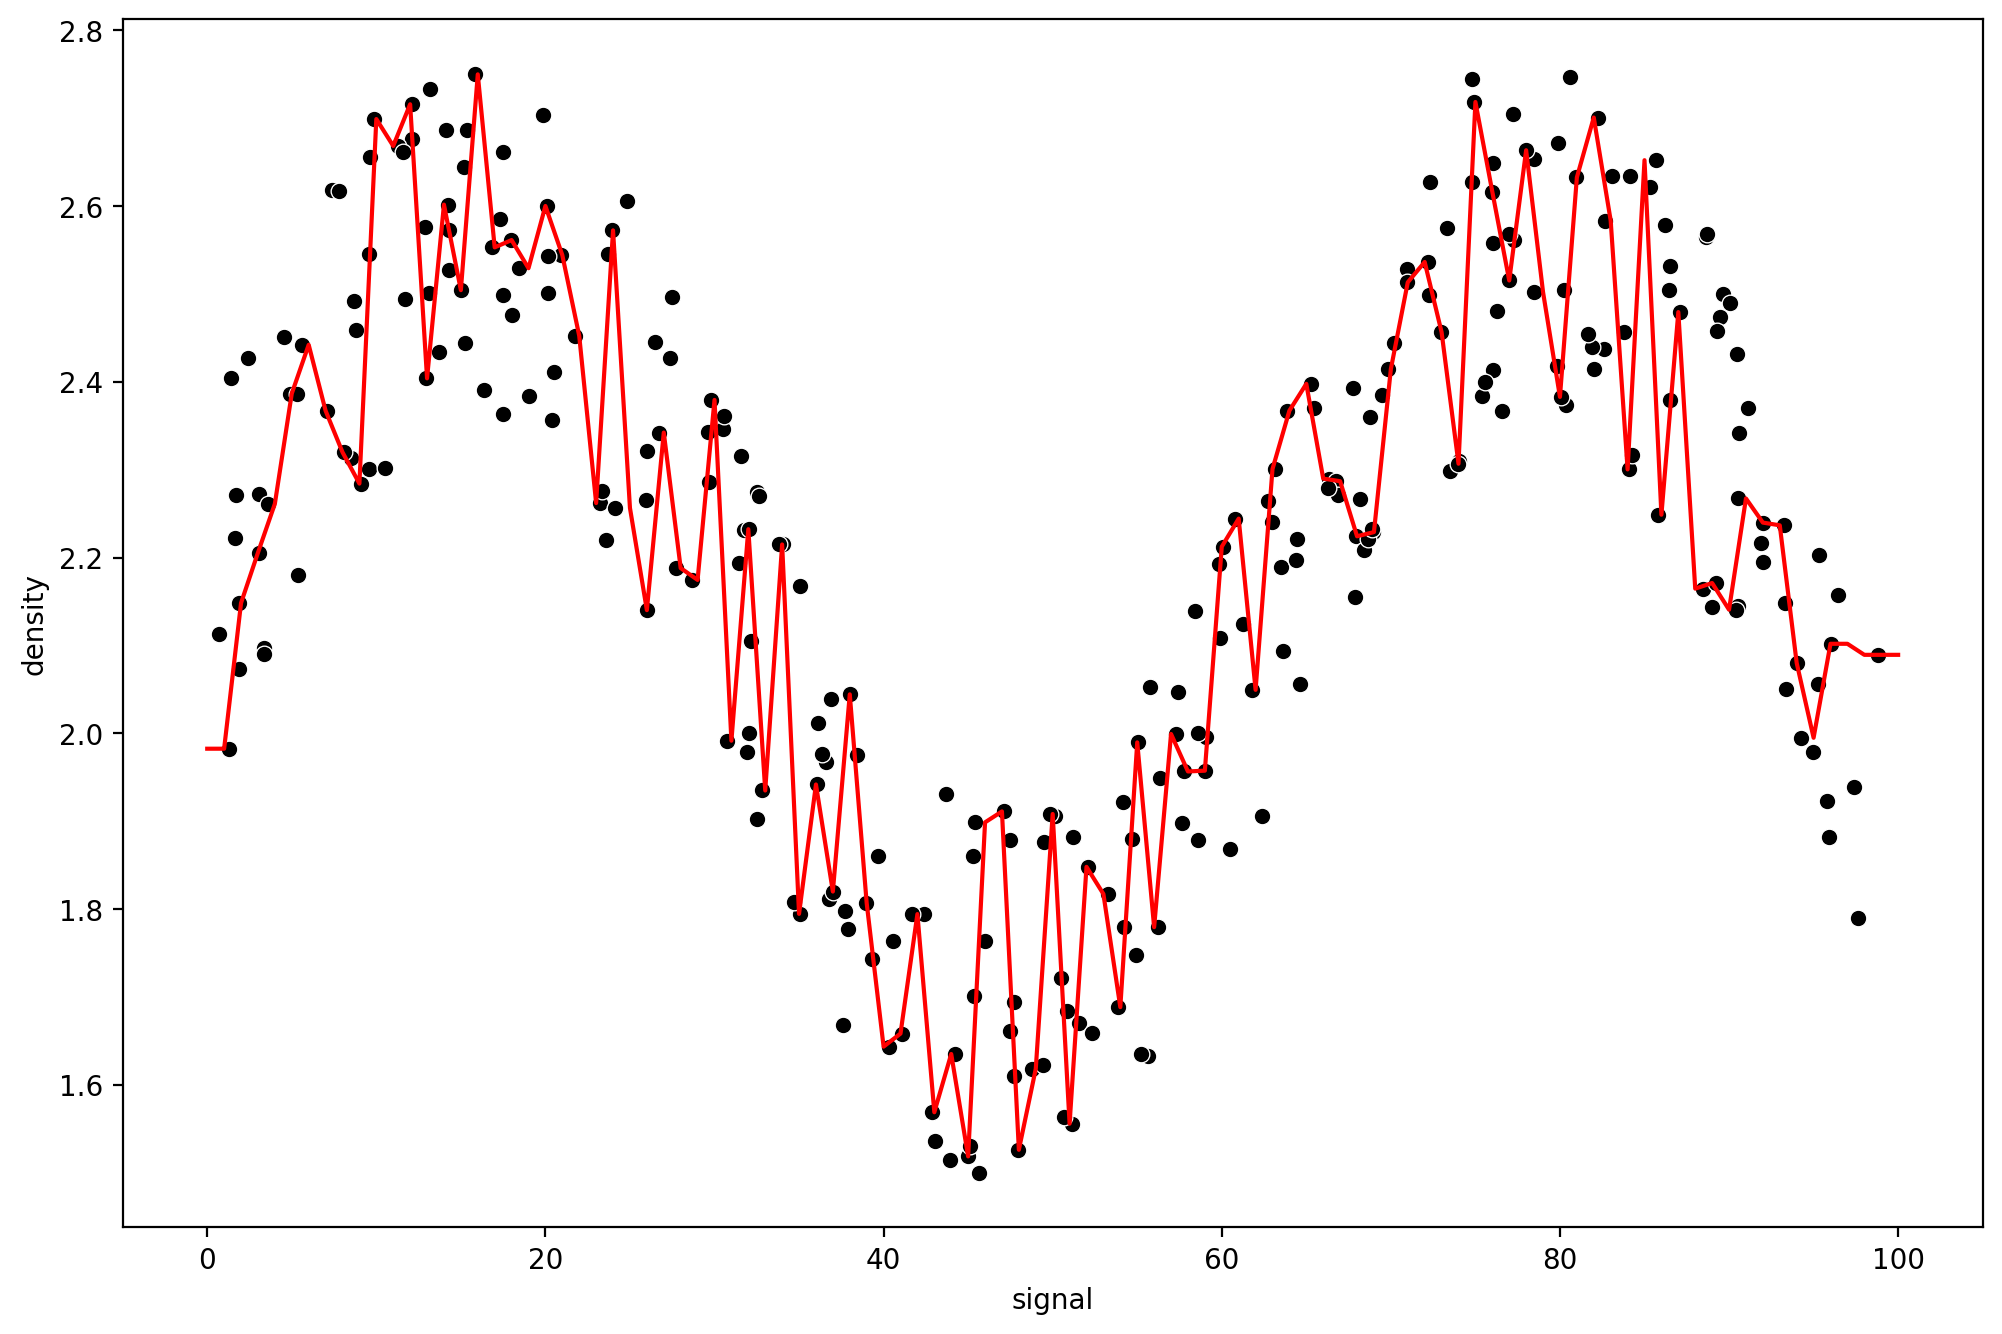

error terms for KNeighborsRegressor(n_neighbors=3) are:
 MAE=0.1326216376804781
RMSE=0.1550477544043257


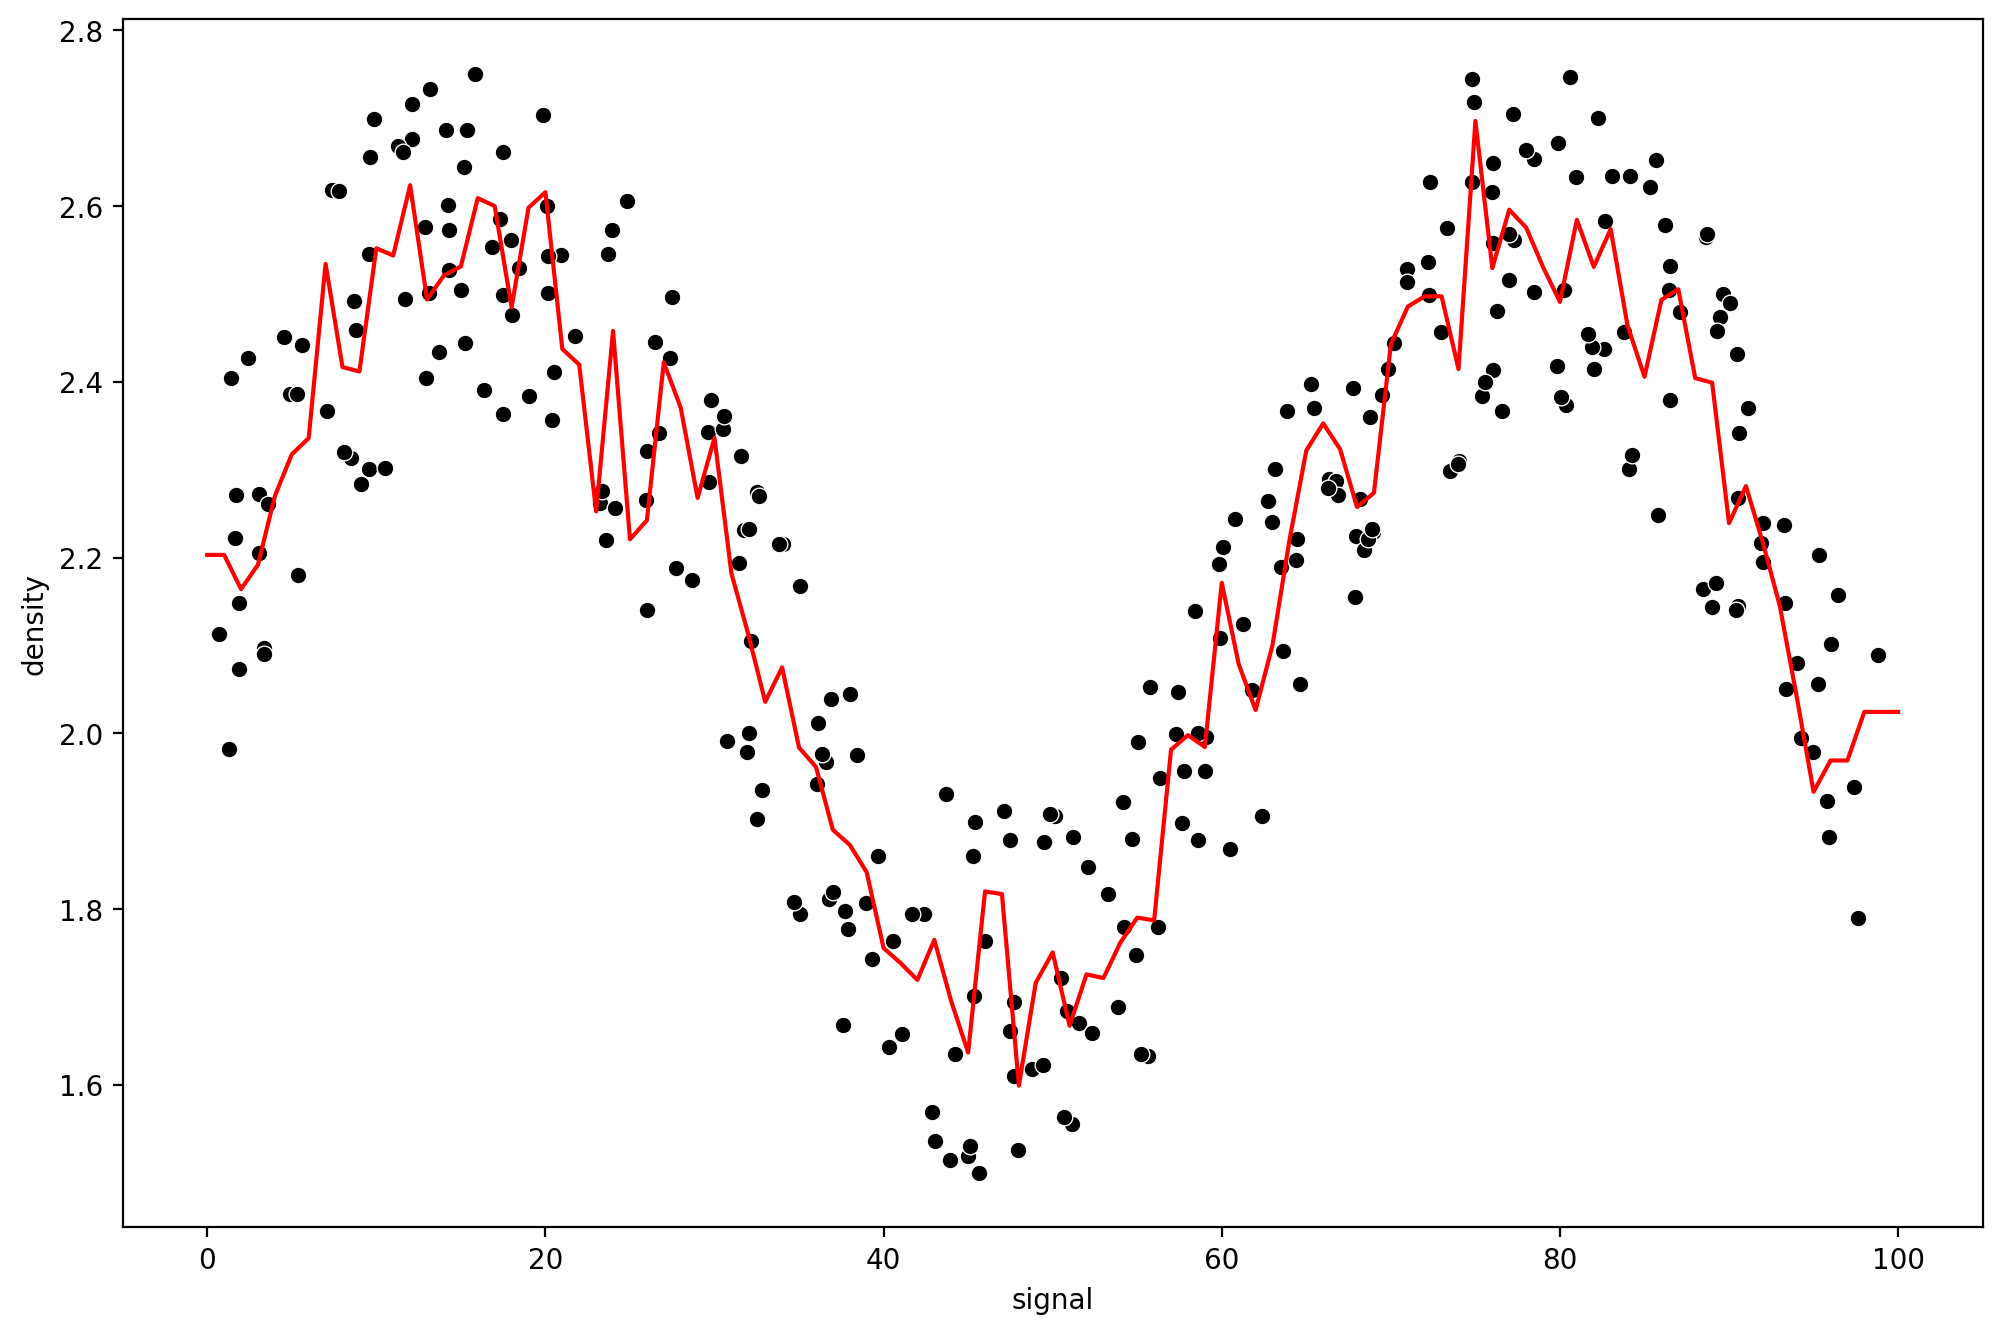

error terms for KNeighborsRegressor() are:
 MAE=0.1228047795689763
RMSE=0.14234795418941038


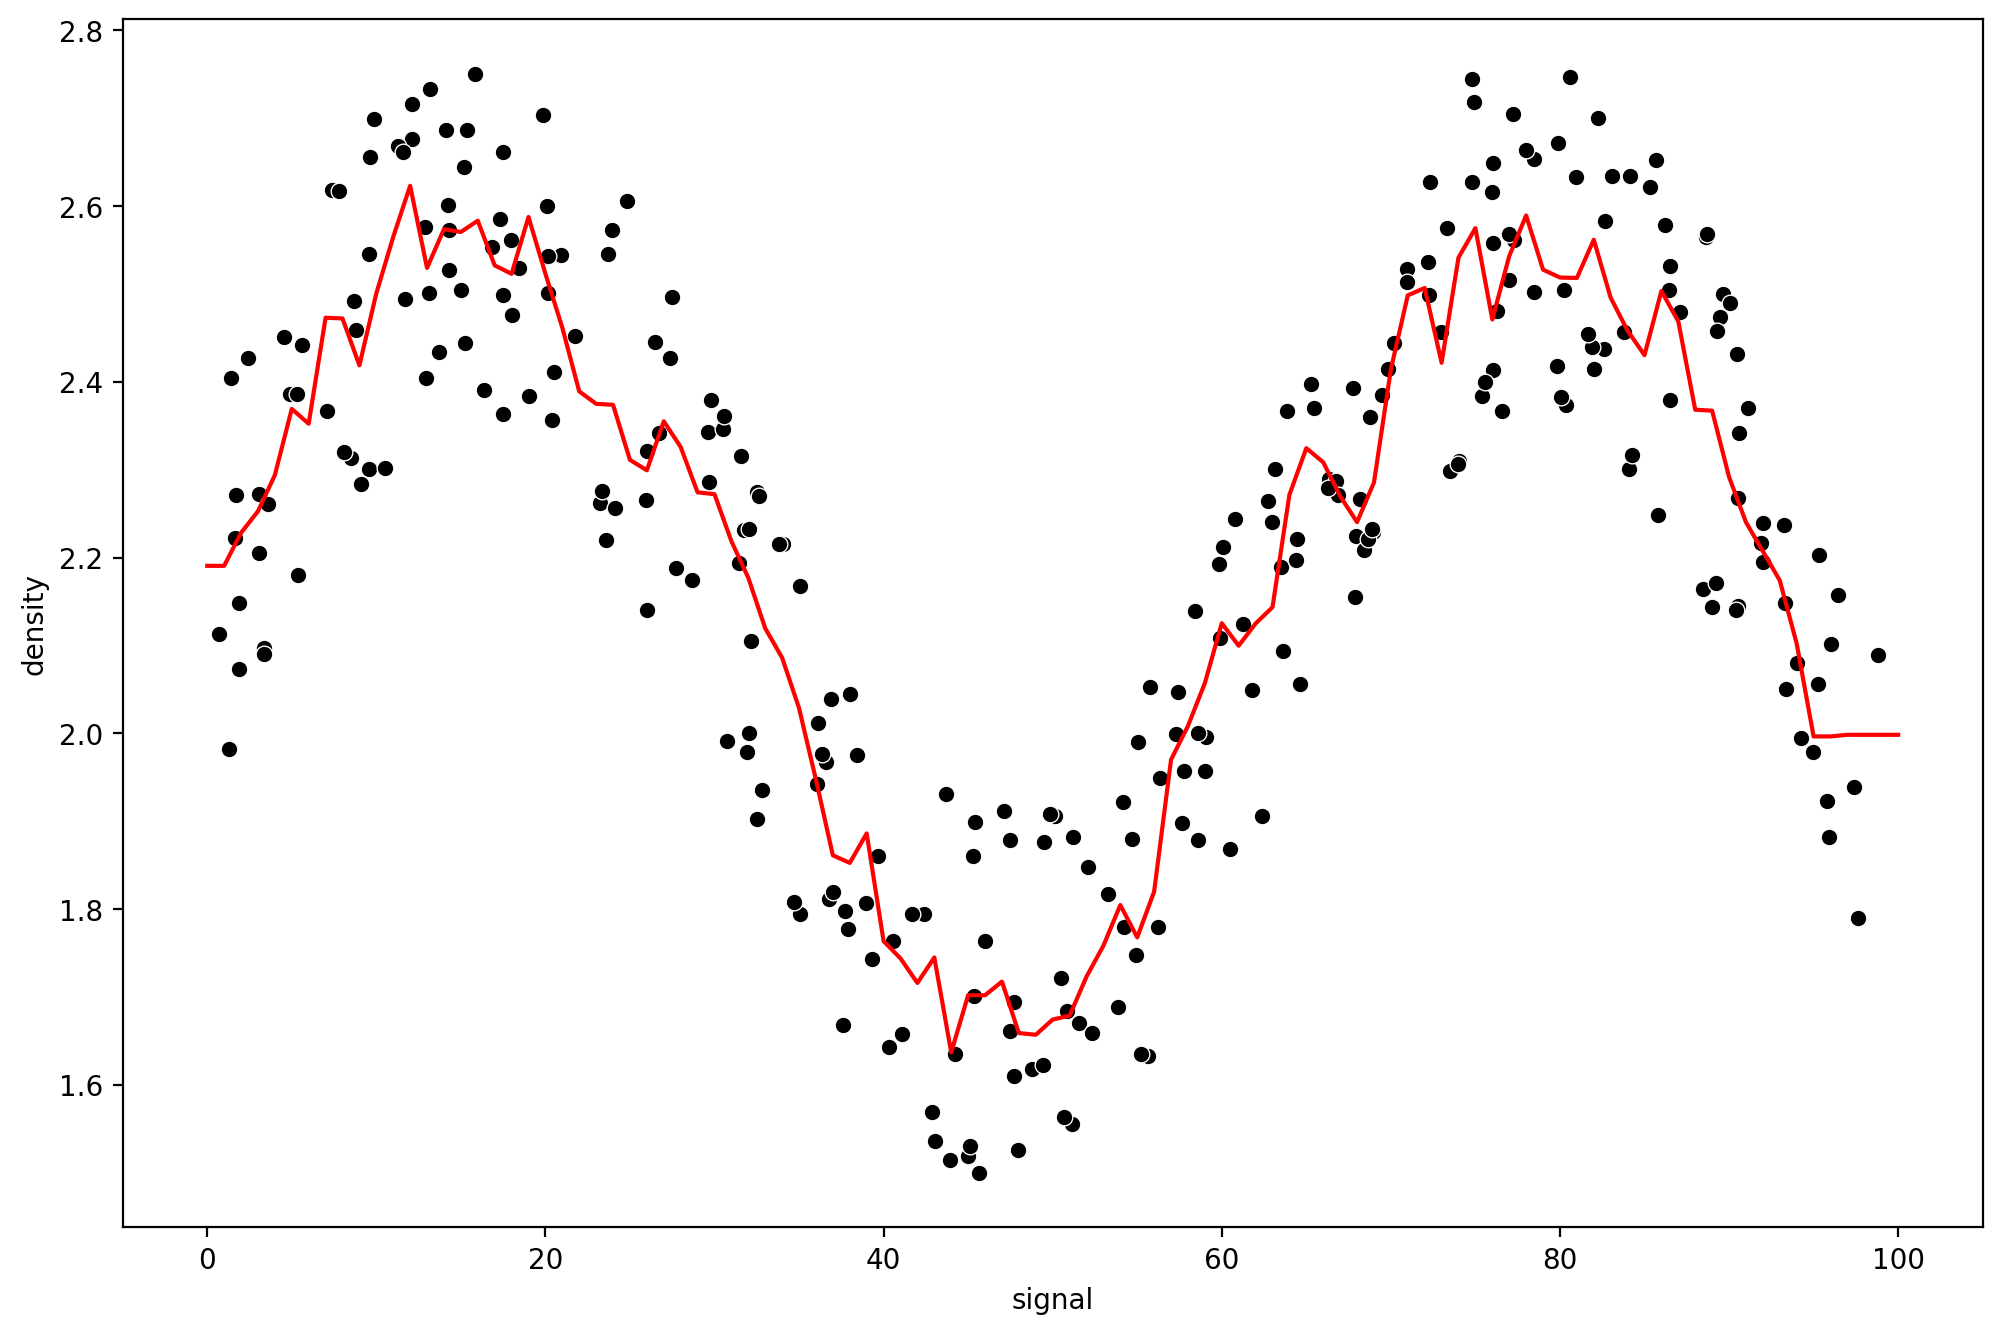

error terms for KNeighborsRegressor(n_neighbors=10) are:
 MAE=0.1276622179091117
RMSE=0.14697234056686695


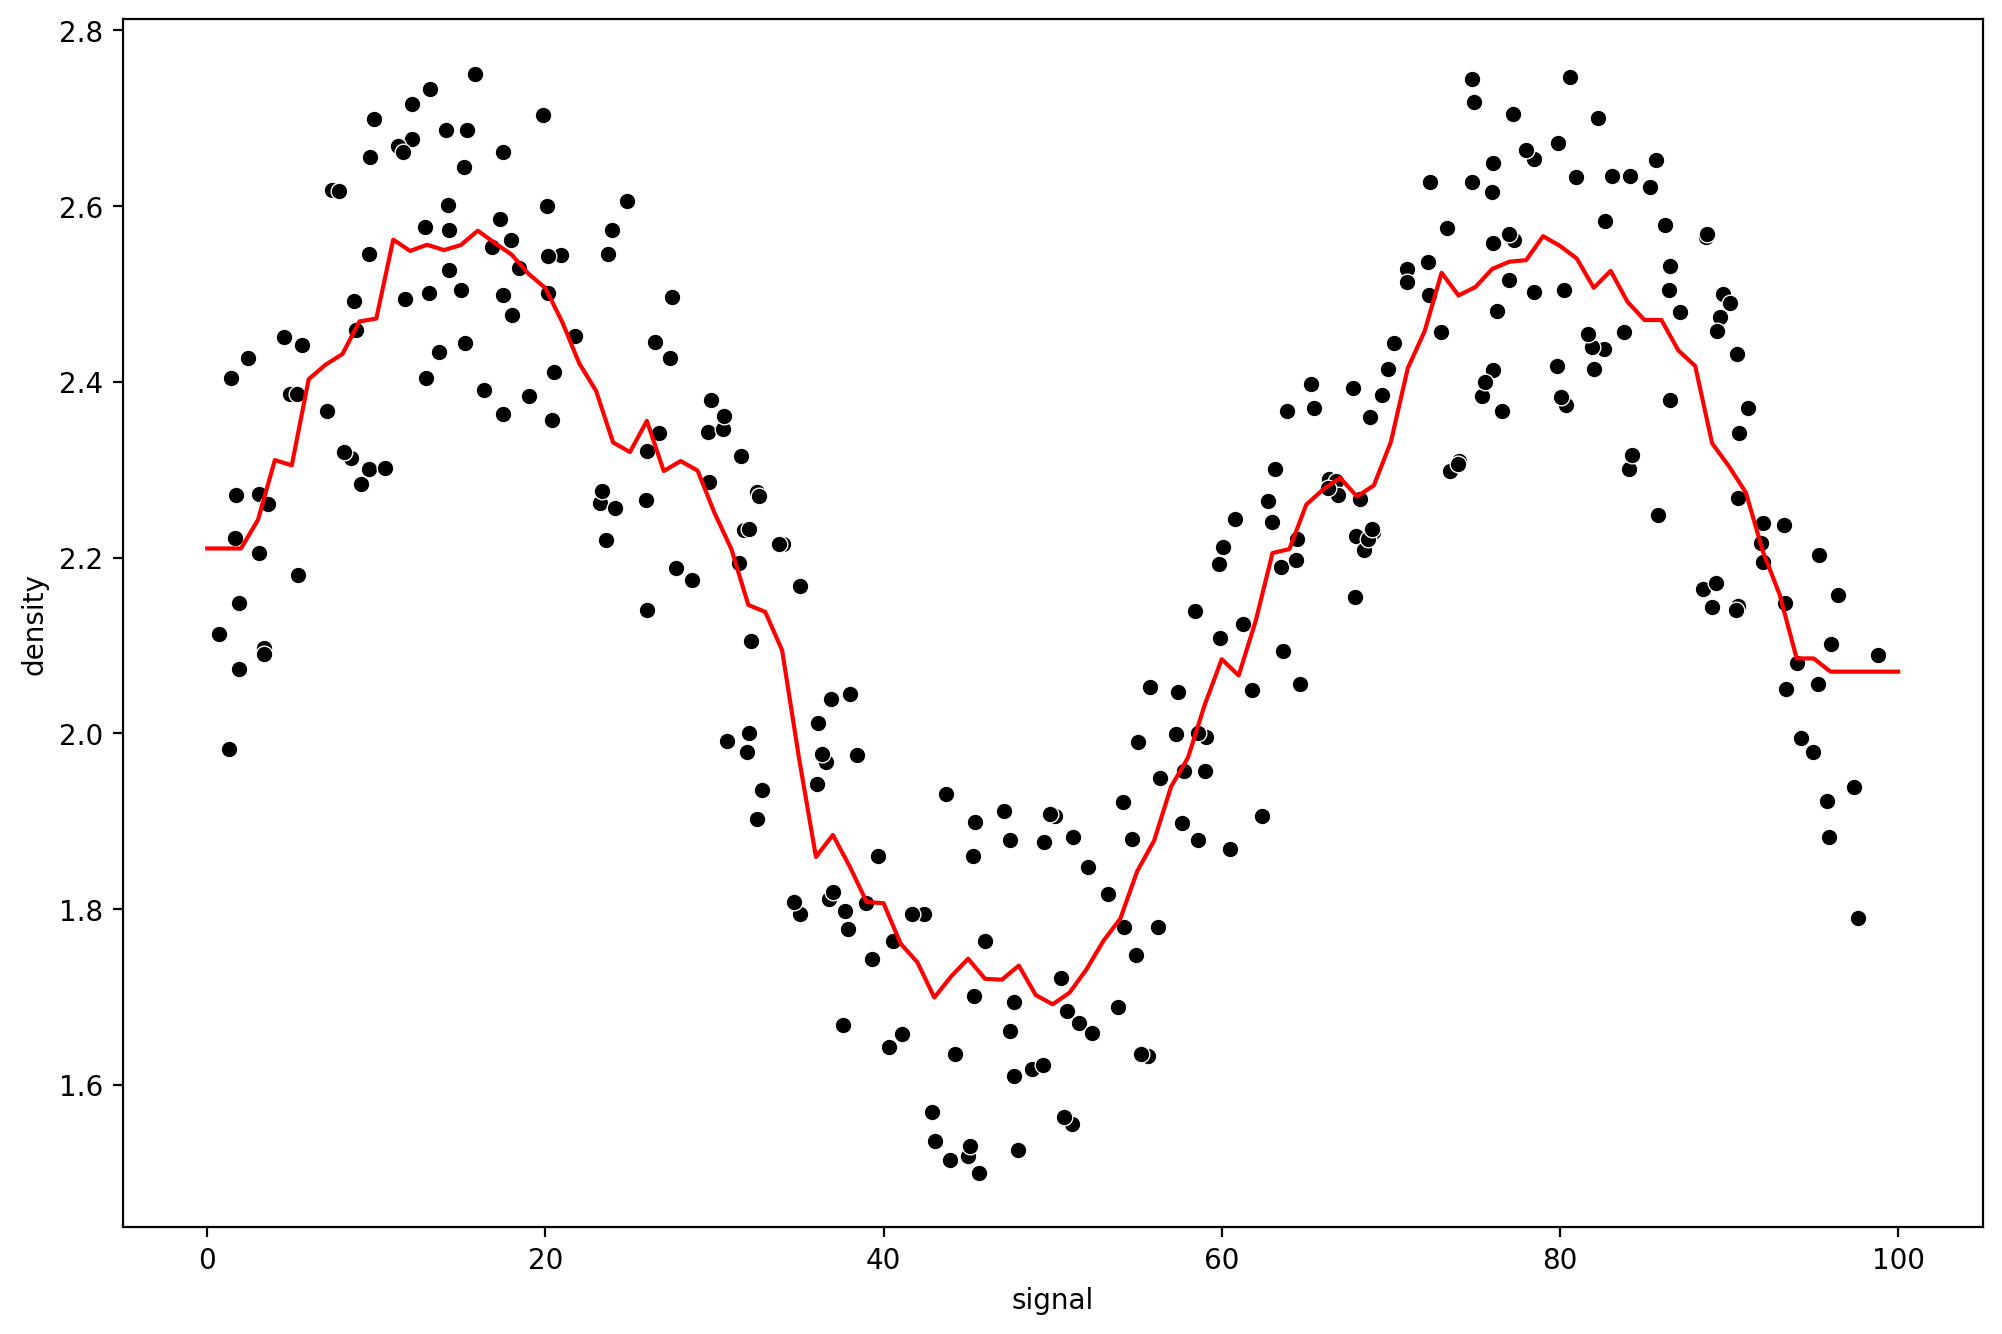

error terms for KNeighborsRegressor(n_neighbors=15) are:
 MAE=0.12822760352049123
RMSE=0.14792939963728416


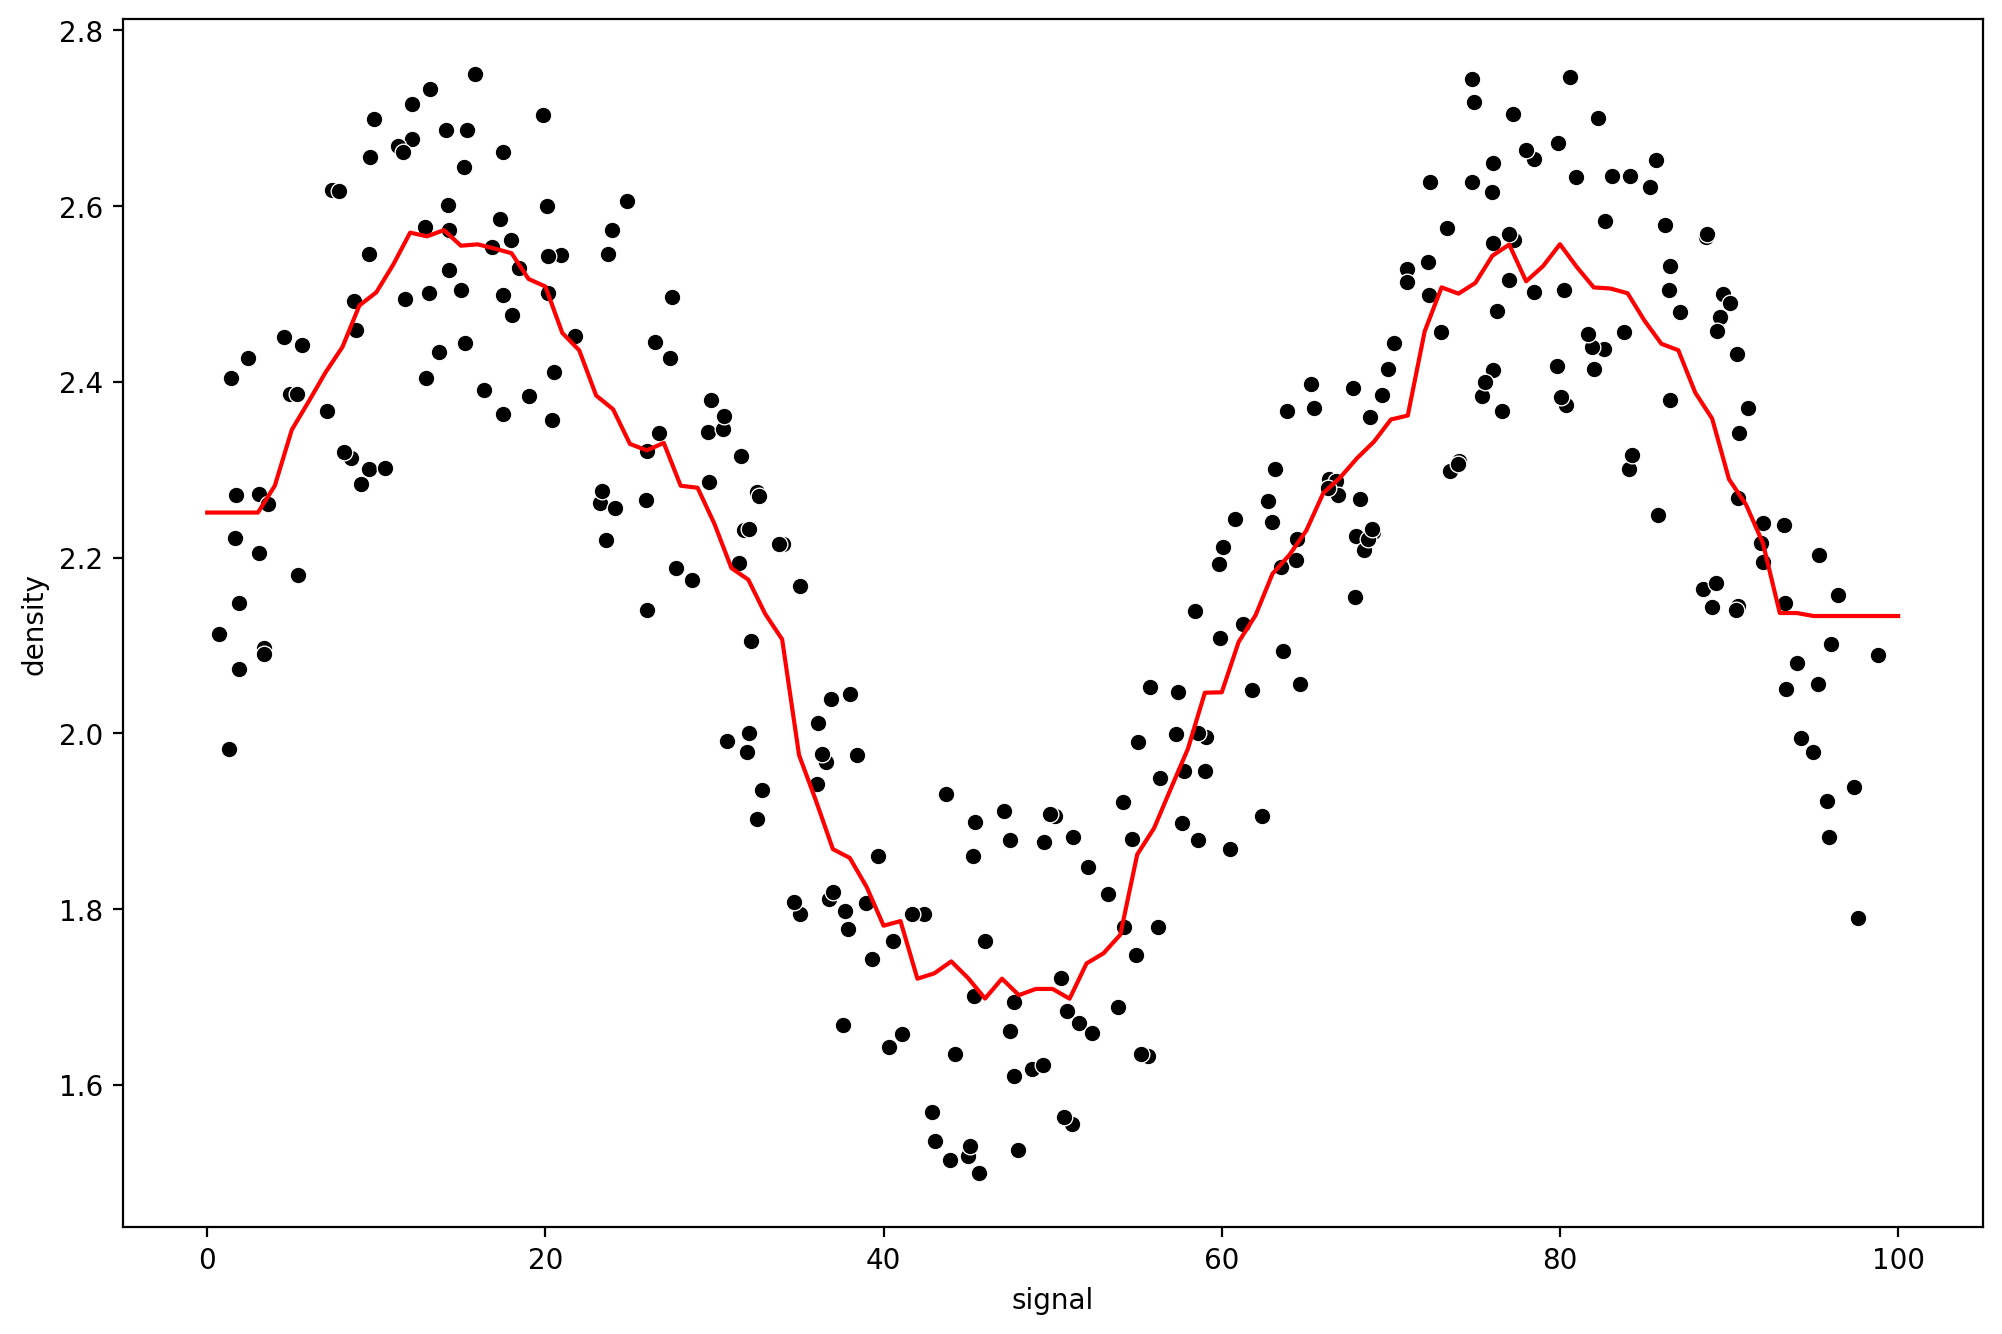

In [24]:
k_val=[1,3,5,10,15]
for i in k_val:
    knn_model=KNeighborsRegressor(n_neighbors=i)
    record_model(knn_model,X_train,X_test,y_train,y_test)

######  knn model is picking too much noise from the dataset ,hence the model have high variance 

## DECISION TREE REGRESSION 

In [25]:
from sklearn.tree import DecisionTreeRegressor

error terms for DecisionTreeRegressor(max_depth=8) are:
 MAE=0.12175279622548152
RMSE=0.15437043547117815


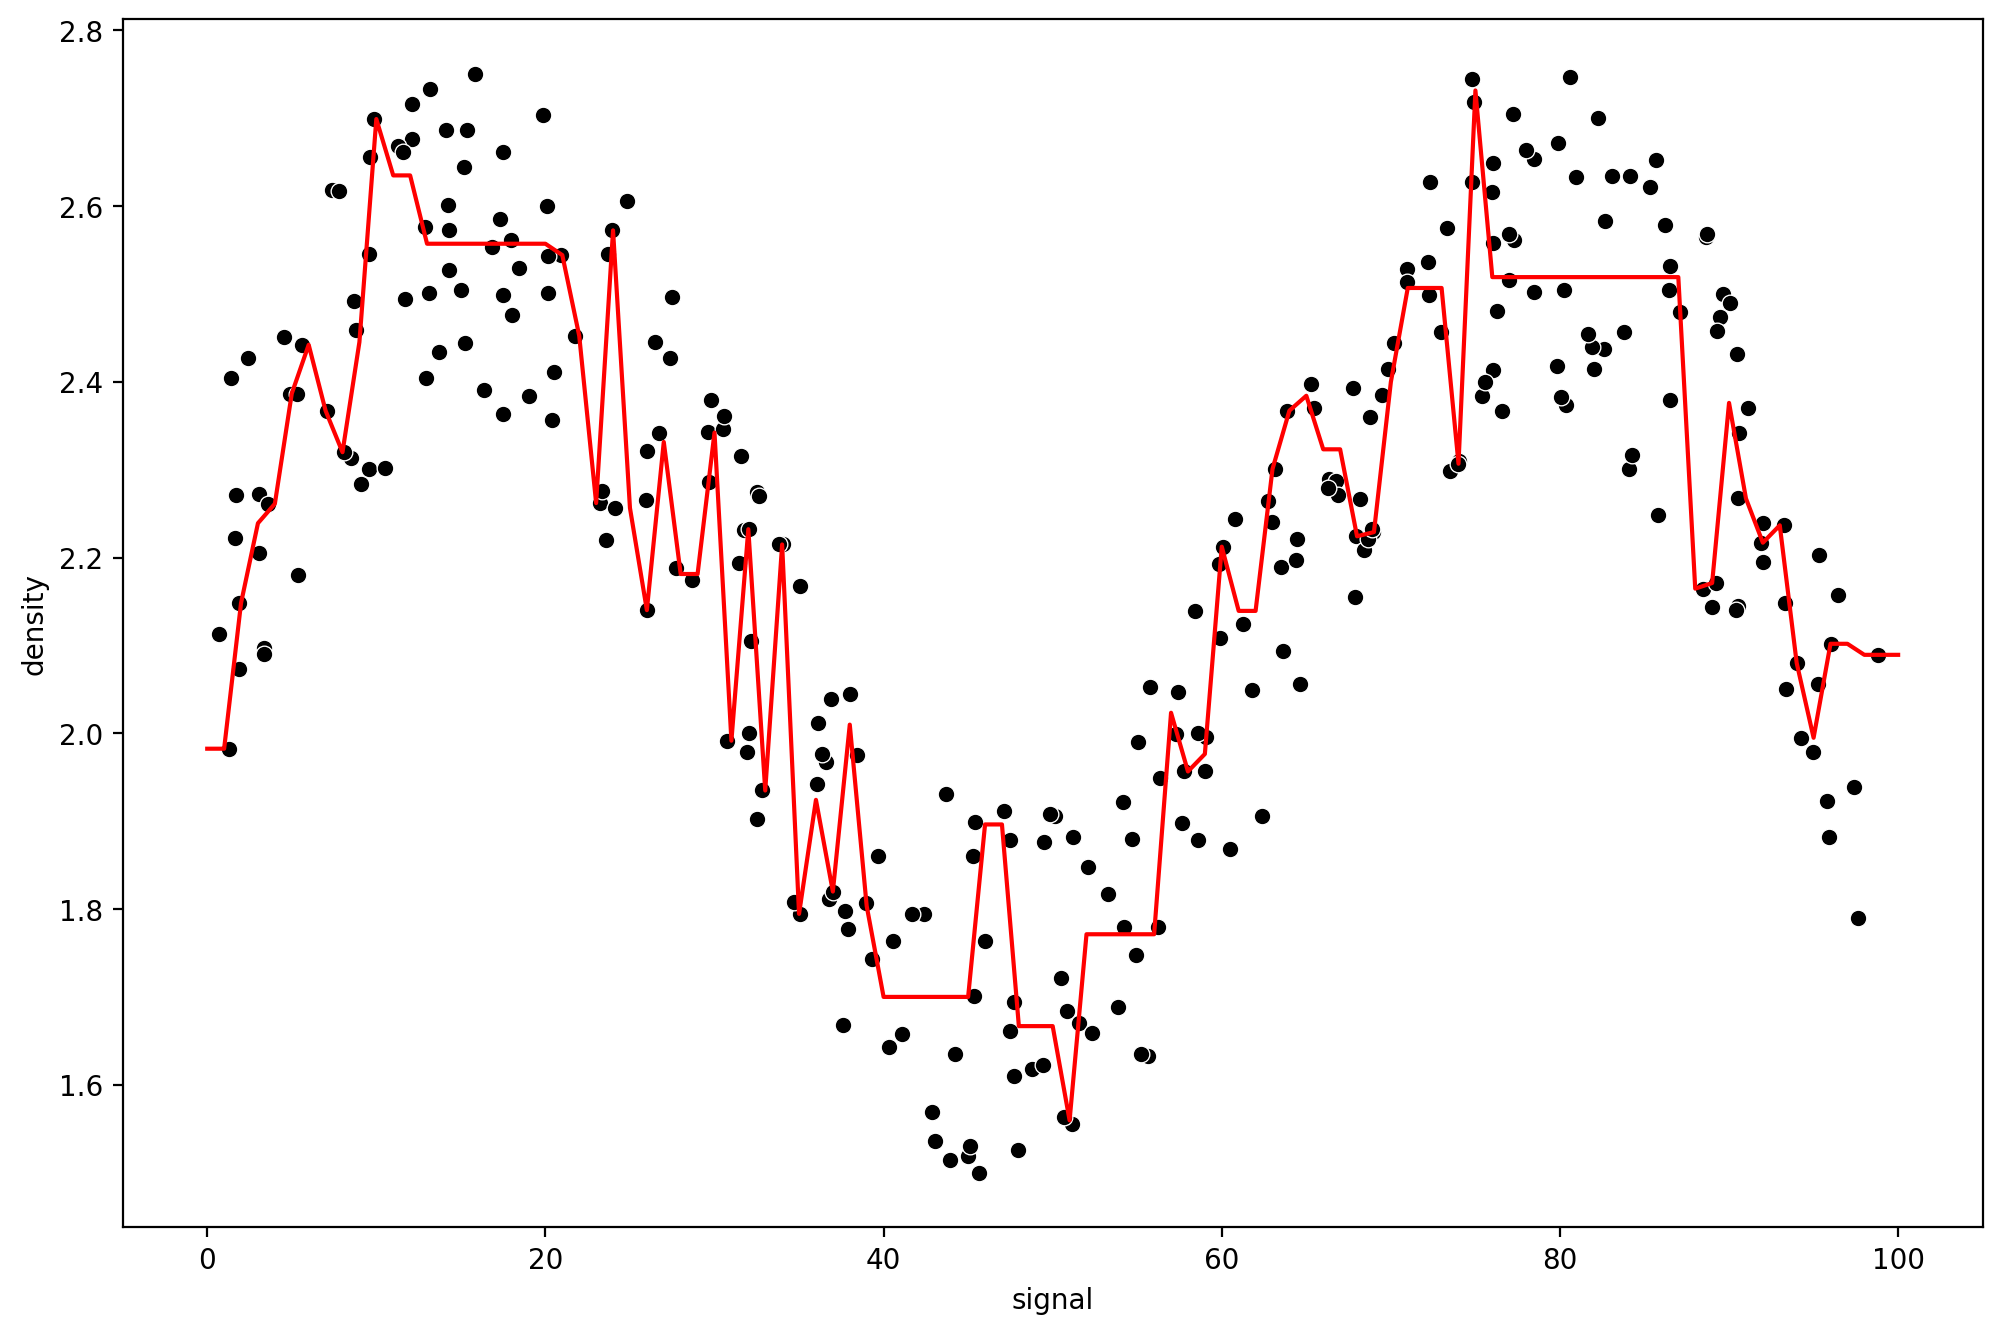

In [26]:
desc_model=DecisionTreeRegressor(max_depth=8)
record_model(desc_model,X_train,X_test,y_train,y_test)

## SUPPORT VECTOR REGRESSION

In [27]:
from sklearn.svm import SVR

In [28]:
svr_model=SVR()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
#kernel=['rbf','linear','poly']
#degree=[3,5,6,7]
C=[0.01,0.1,1,5,10,100,1000]
gamma=['auto','scale']
param_grid={'C':C,'gamma':gamma}

In [31]:
grid_model=GridSearchCV(svr_model,param_grid=param_grid)

error terms for GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
                         'gamma': ['auto', 'scale']}) are:
 MAE=0.12291250457907964
RMSE=0.14029718751178147


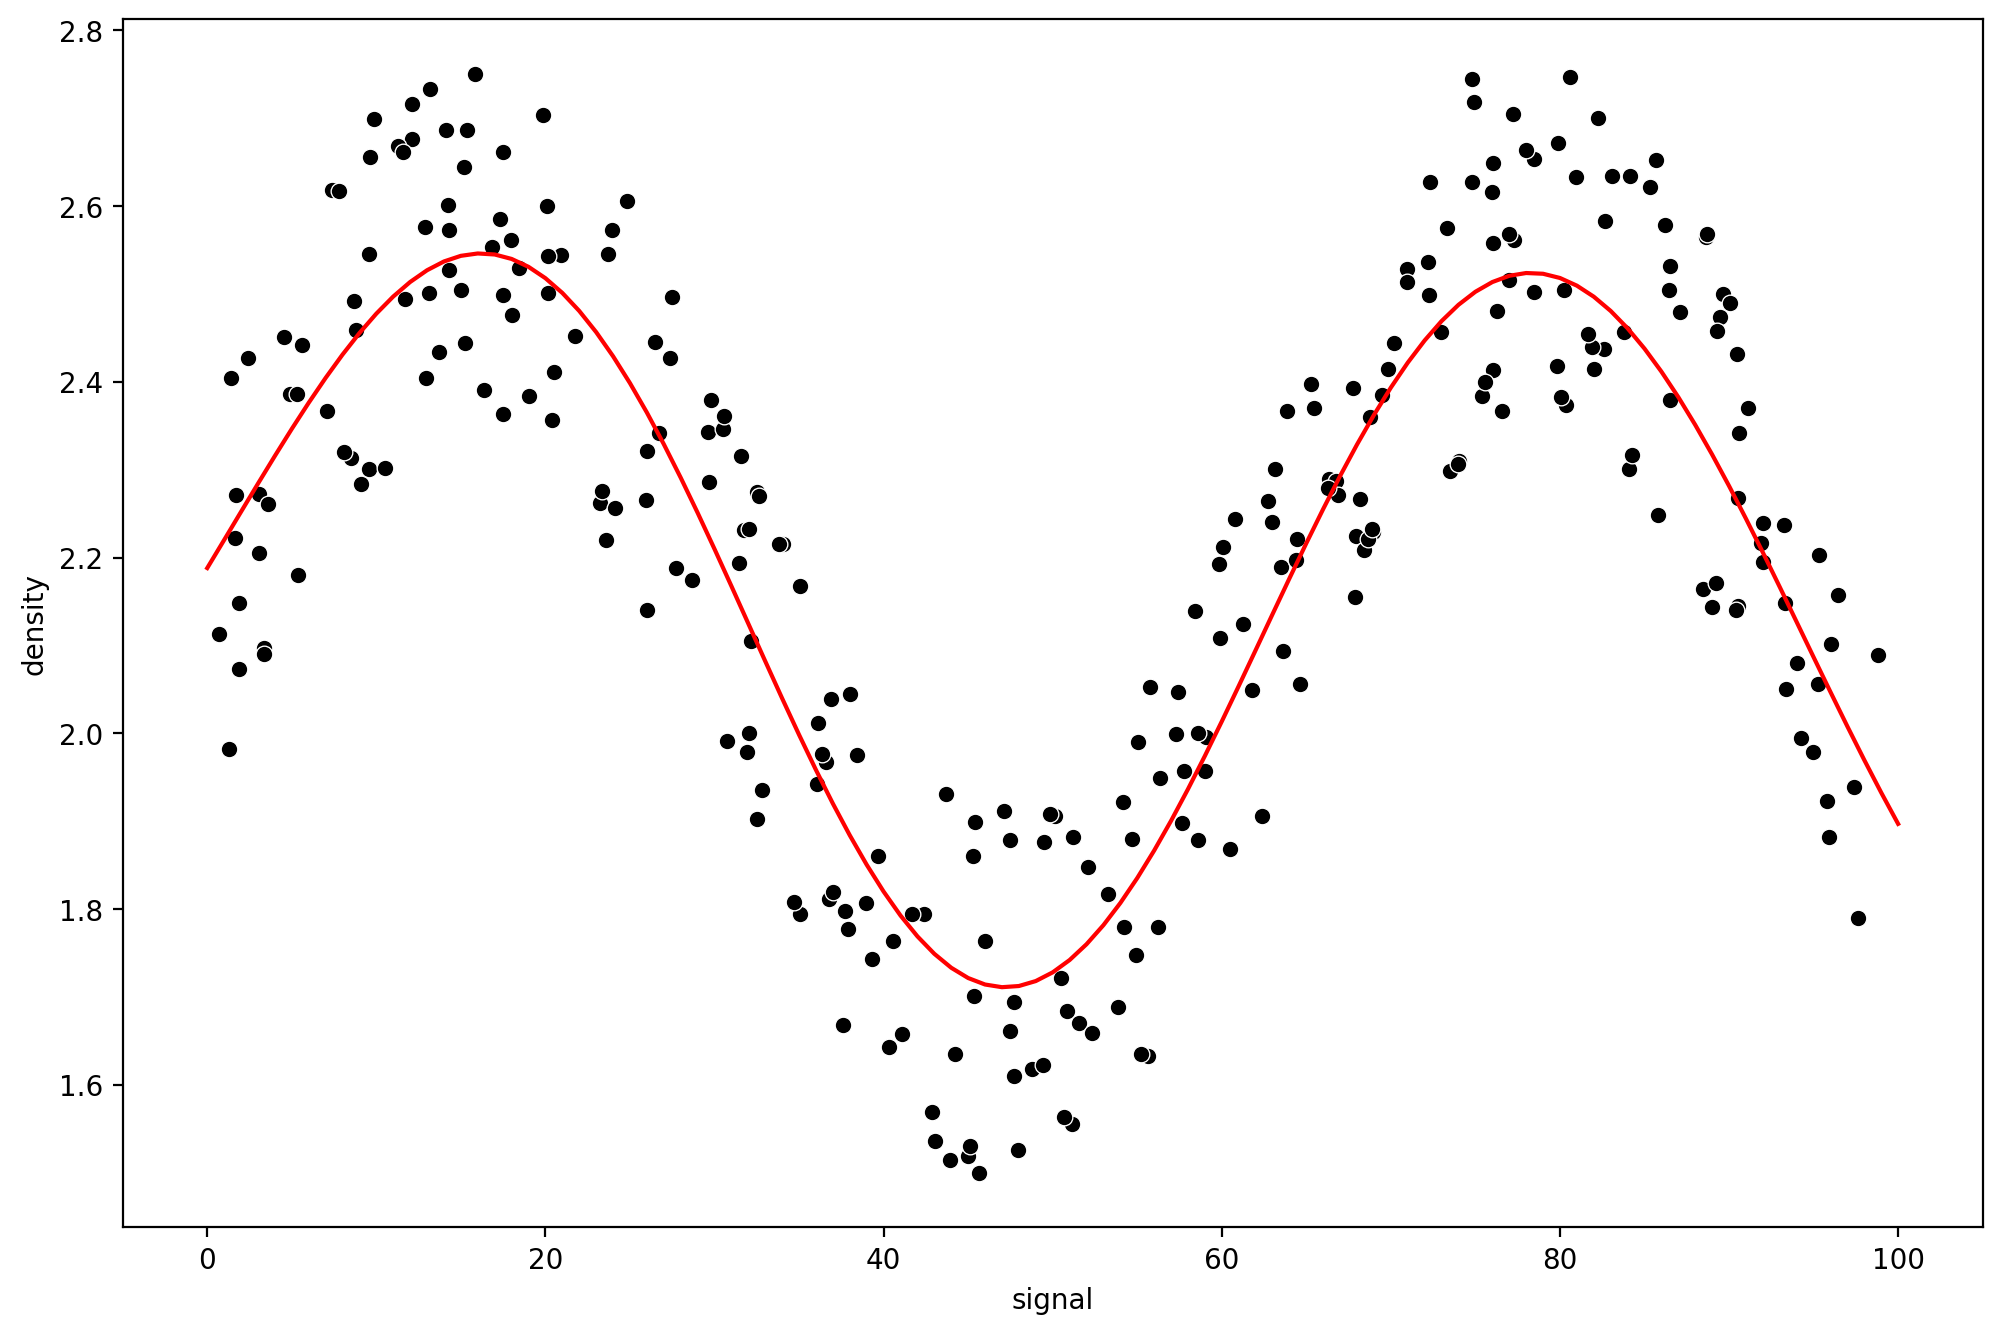

In [32]:
record_model(grid_model,X_train,X_test,y_train,y_test)

###### svm acted good for the data set

## RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
random_model=RandomForestRegressor(n_estimators=10)

error terms for RandomForestRegressor(n_estimators=10) are:
 MAE=0.13338584149309932
RMSE=0.16088242694980115


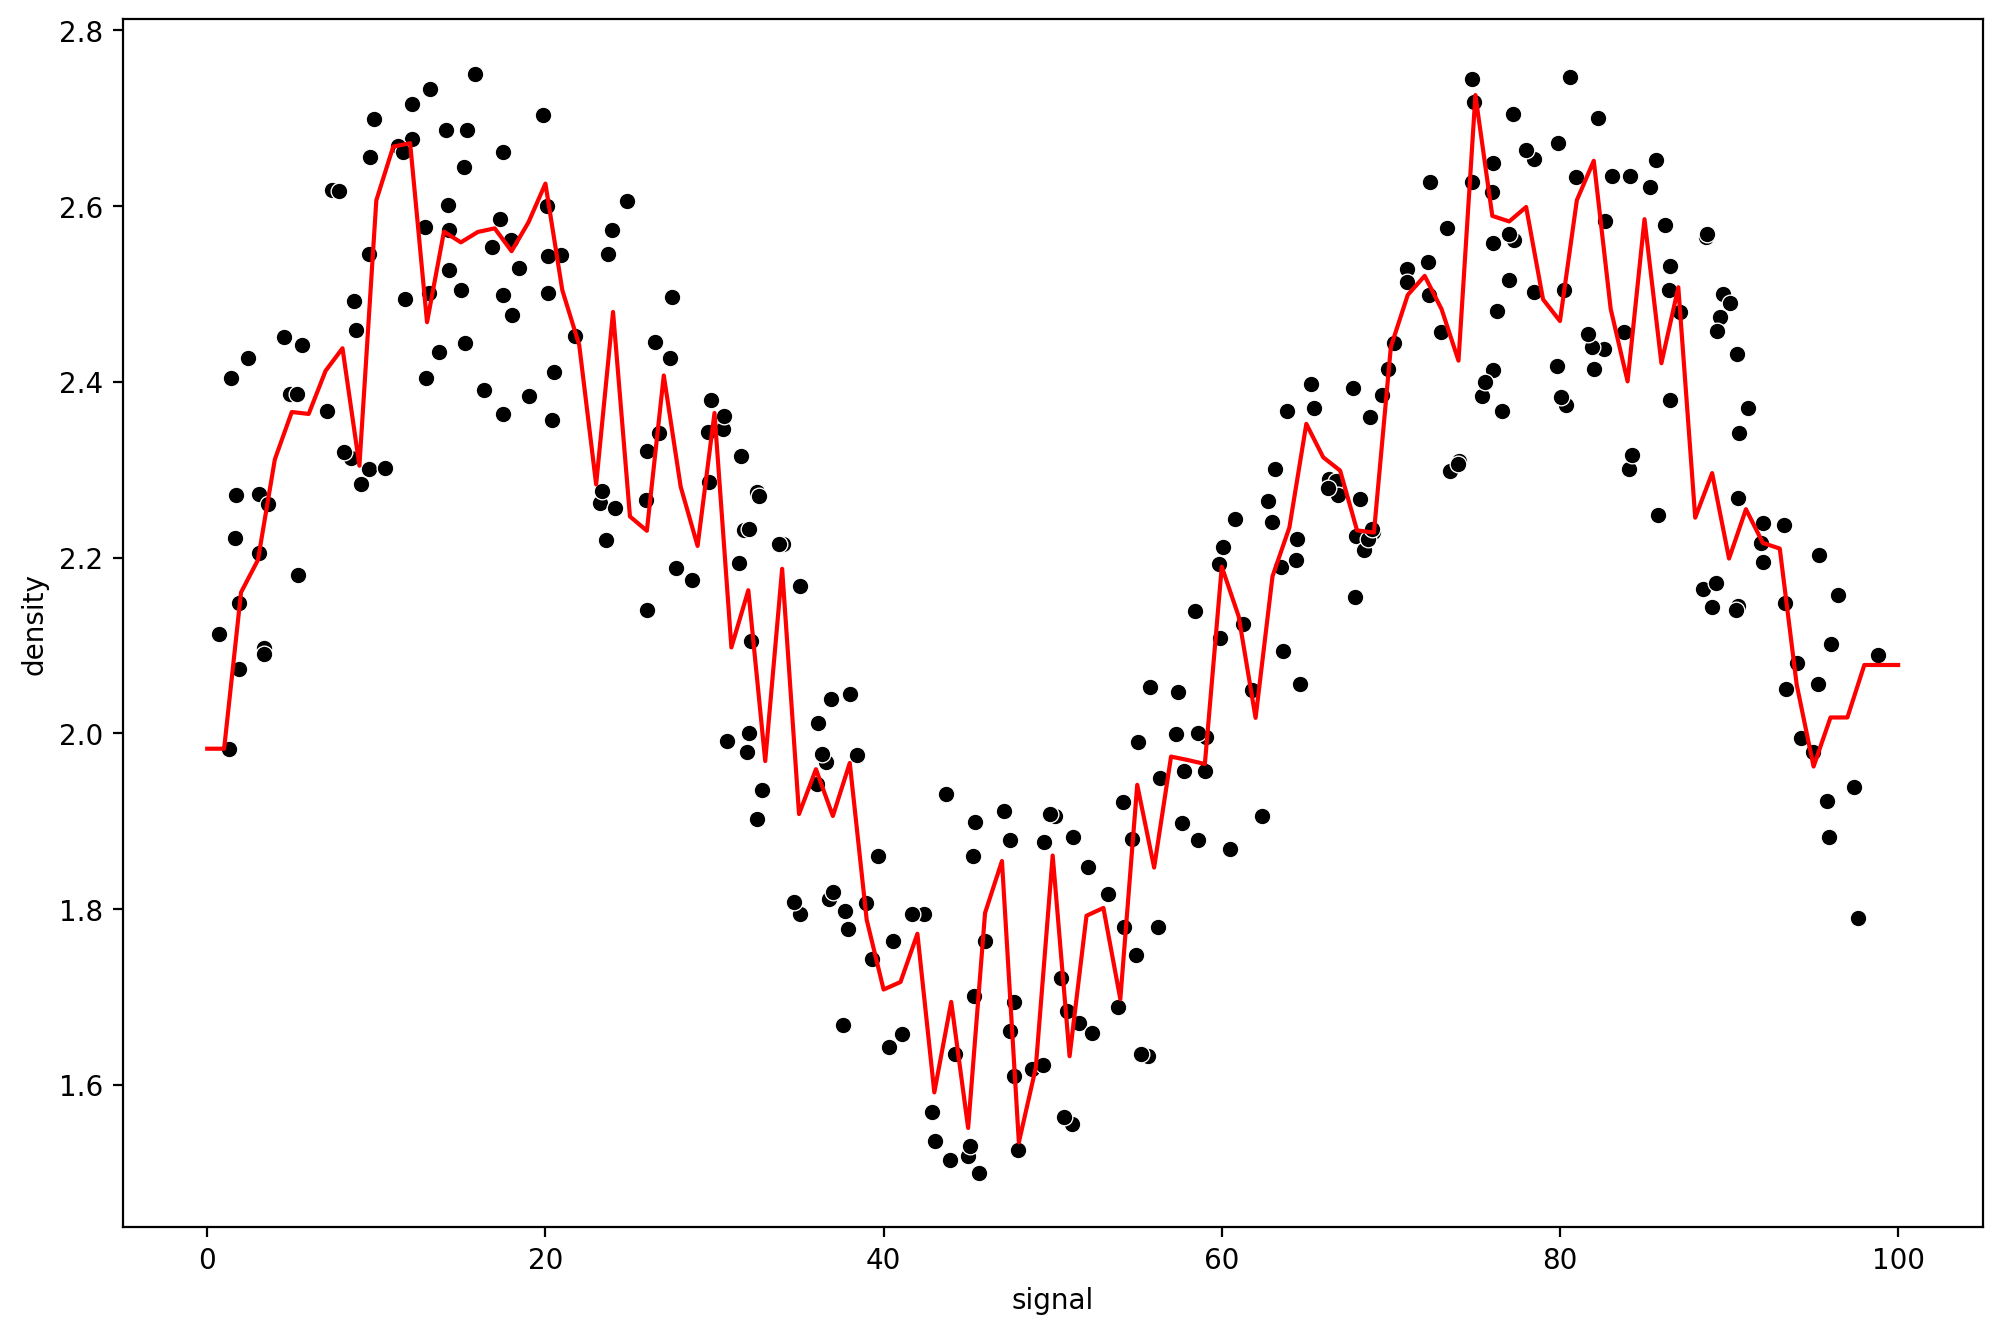

In [36]:
record_model(random_model,X_train,X_test,y_train,y_test)

## GRADIENTBOOST & ADABOOST REGRESSOR

In [37]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [38]:
model_grad=GradientBoostingRegressor()

error terms for GradientBoostingRegressor() are:
 MAE=0.12968047394412516
RMSE=0.15328036907657794


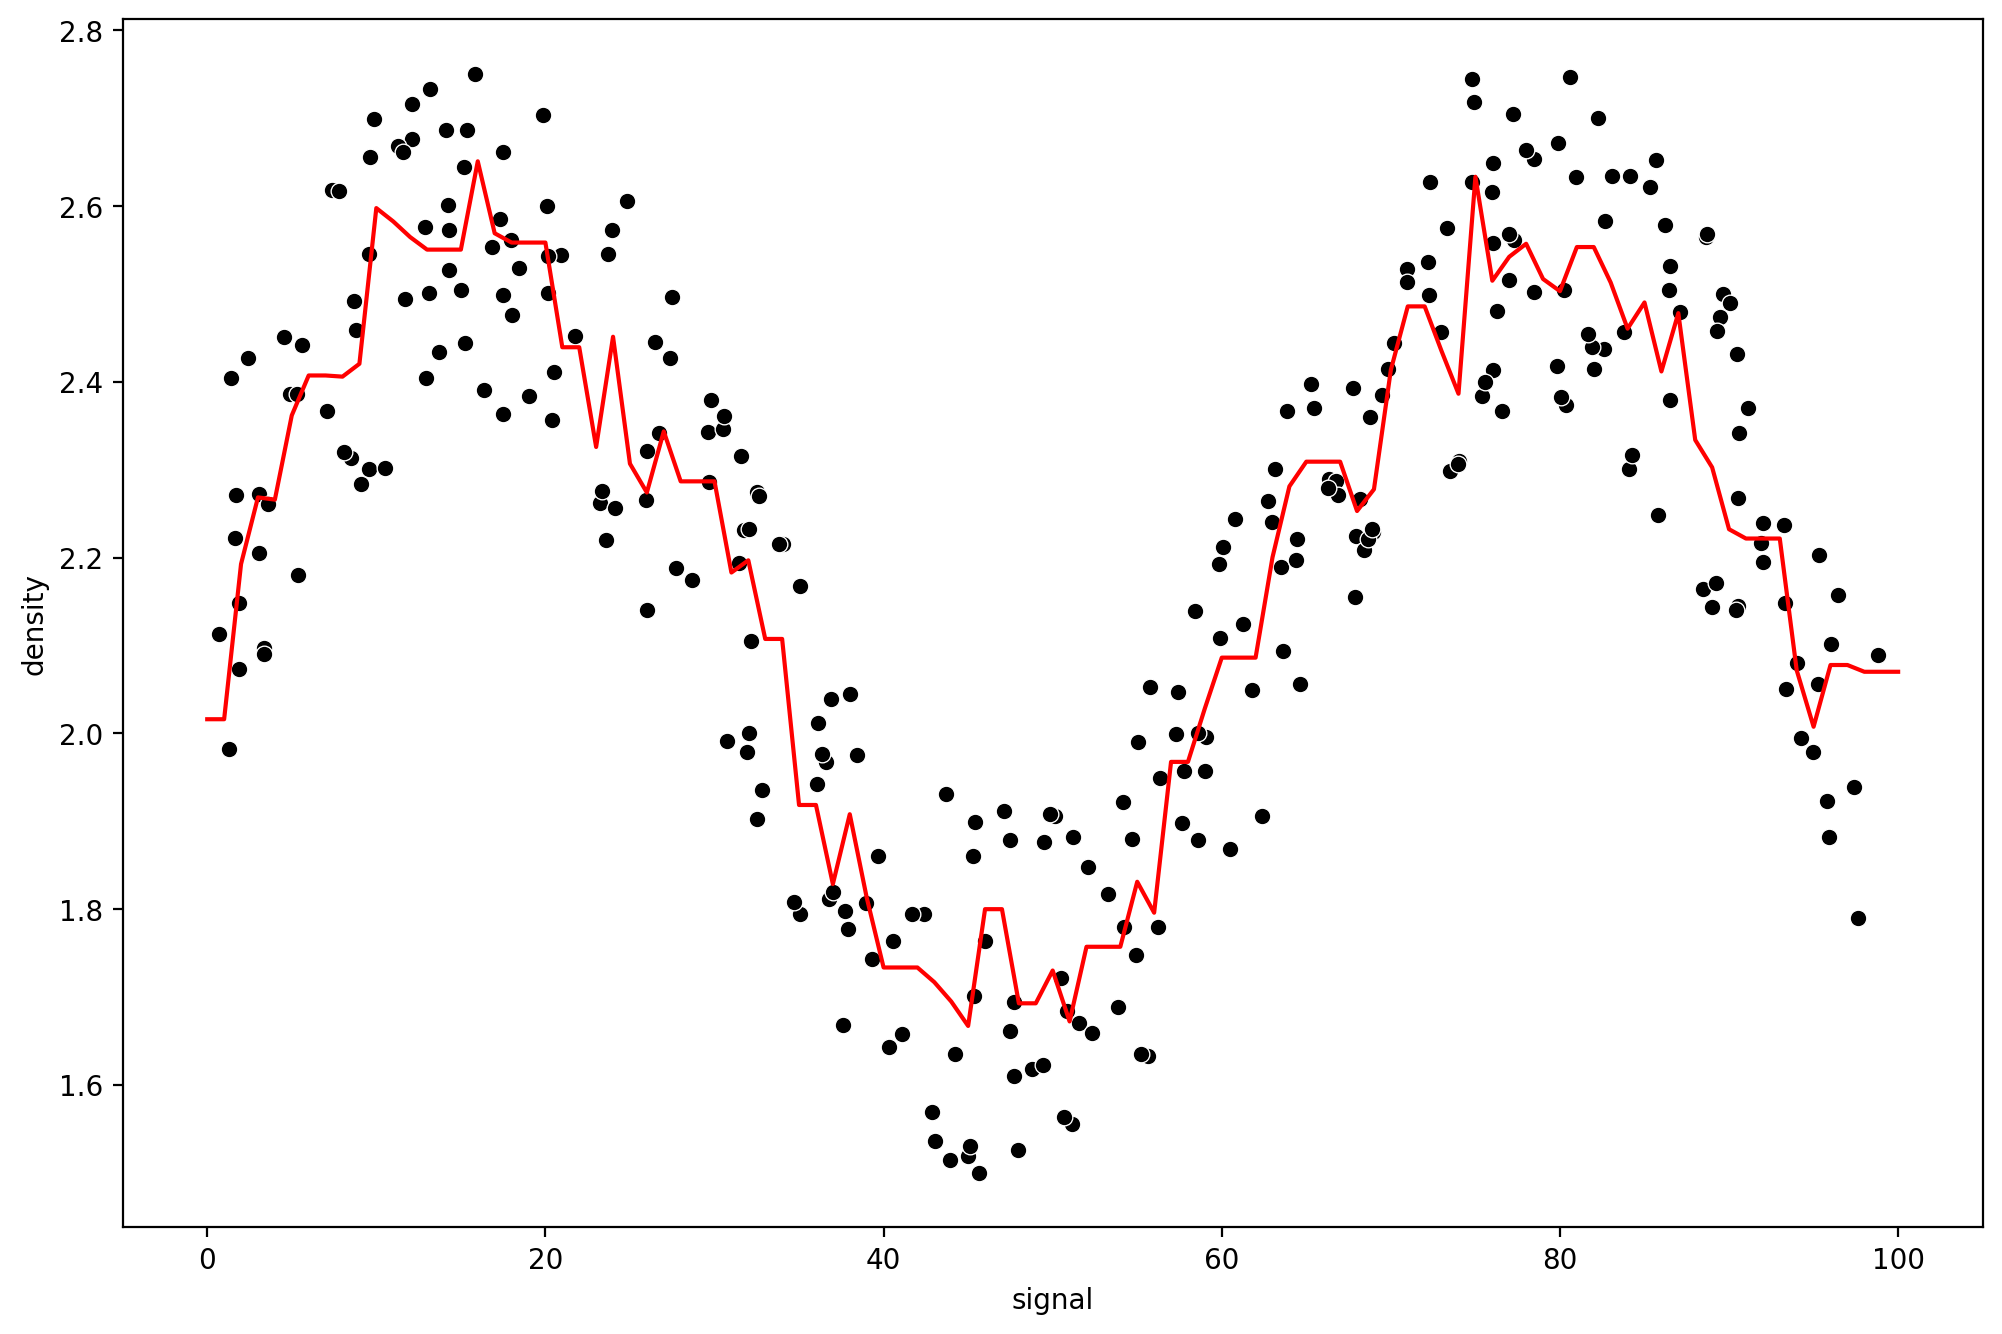

In [40]:
record_model(model_grad,X_train,X_test,y_train,y_test)

In [41]:
model_ada=AdaBoostRegressor()

error terms for AdaBoostRegressor() are:
 MAE=0.13215473174687128
RMSE=0.1522661815874484


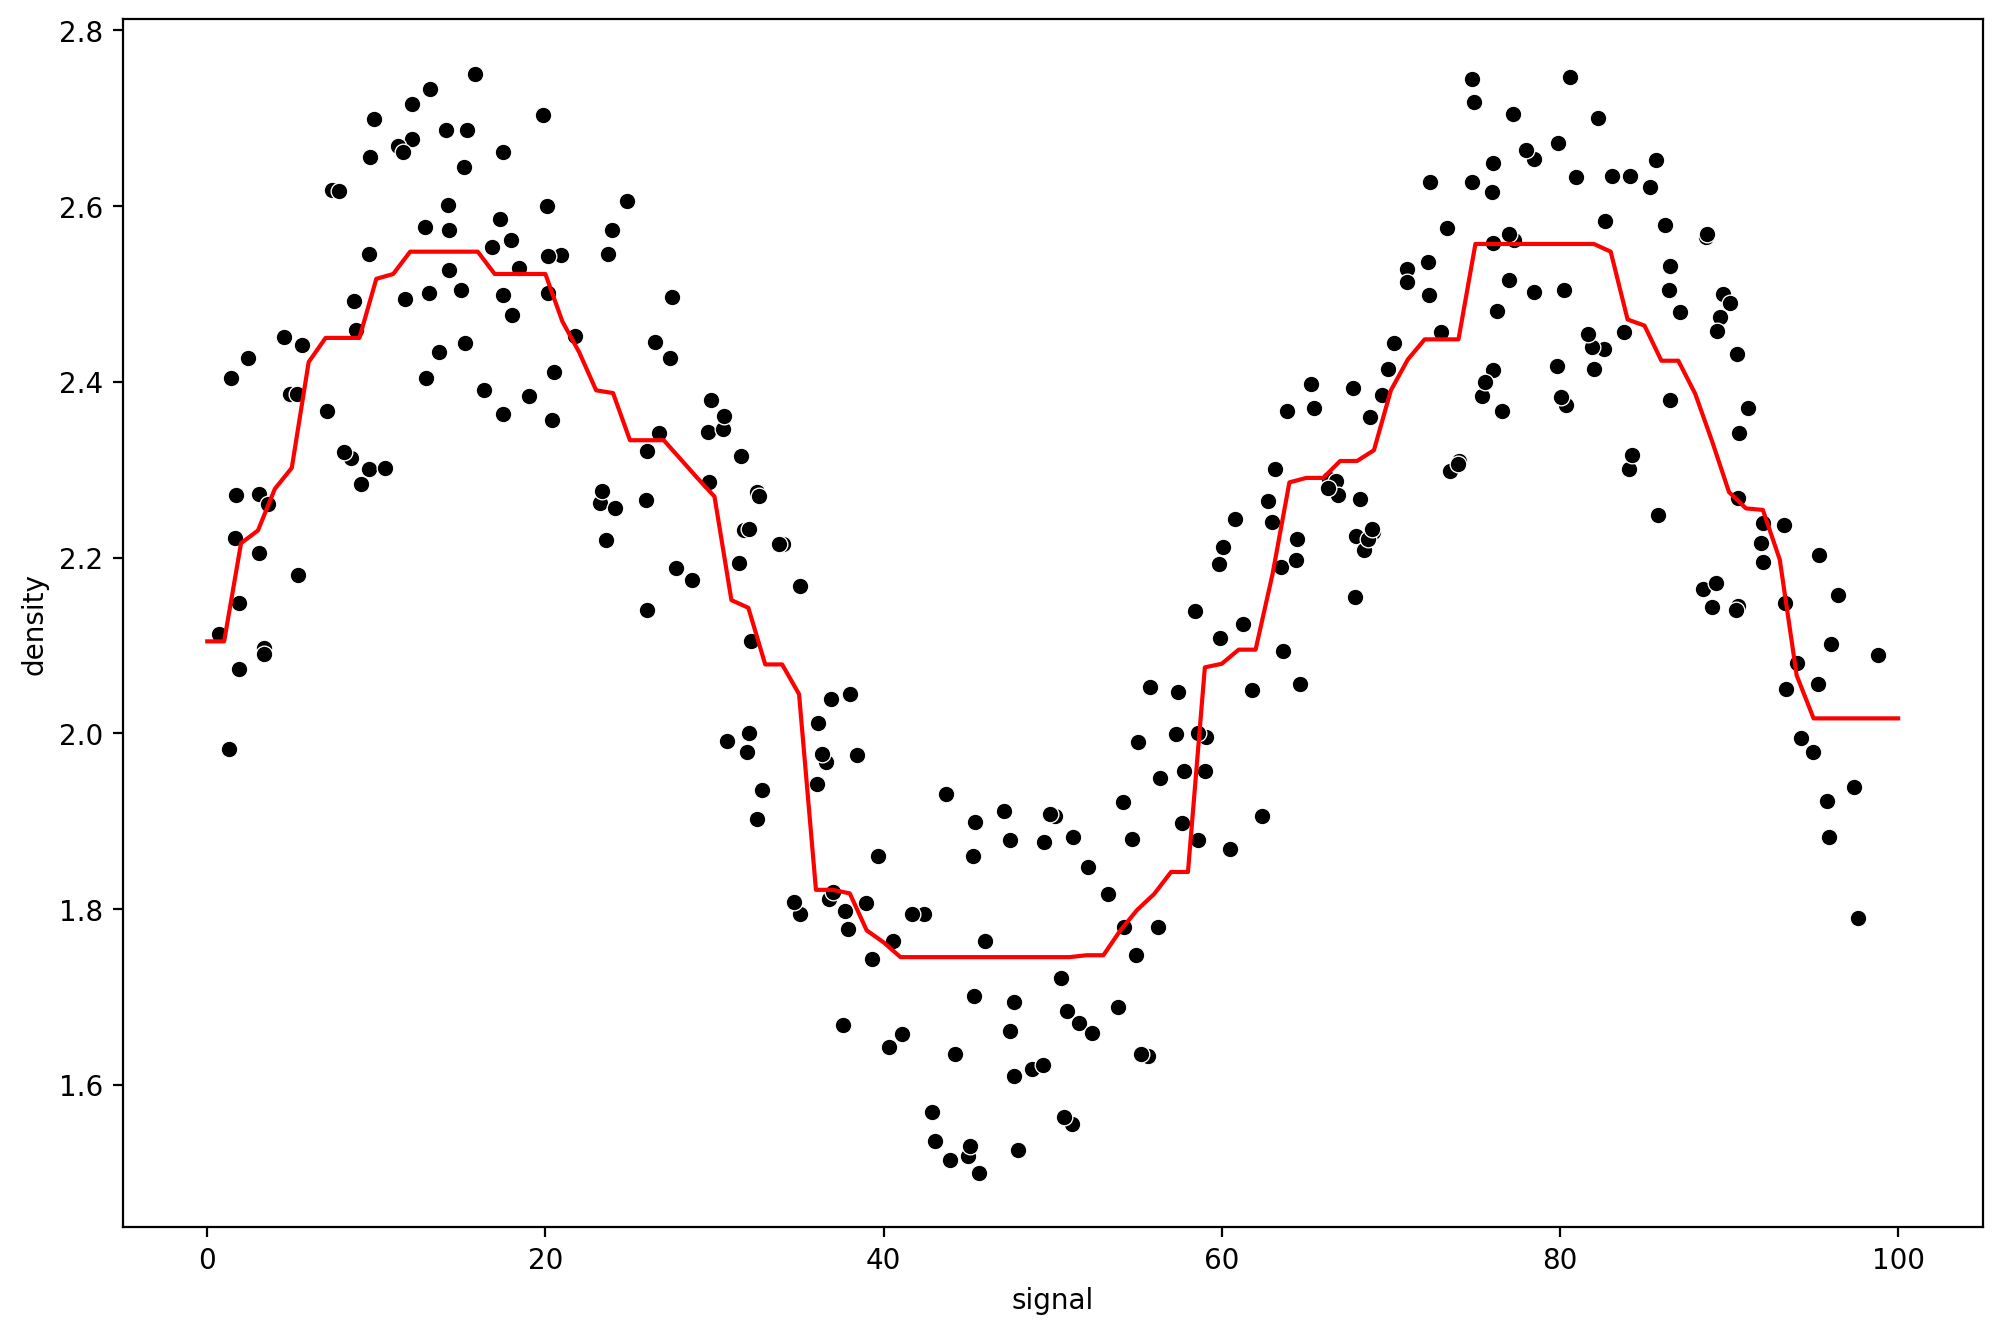

In [42]:
record_model(model_ada,X_train,X_test,y_train,y_test)